In [1]:
# Test migration history reconstruction on simulated data

import sys
import os

repo_dir = "/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/"
os.chdir(repo_dir)
from src.lib import vertex_labeling

from src.util import data_extraction_util as data_util
from src.util import vertex_labeling_util as vert_util
import matplotlib
import torch

MACHINA_DATA_DIR = os.path.join(repo_dir, 'src/data/machina_sims')


CUDA GPU: False
CUDA GPU: False
CUDA GPU: False


In [2]:
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'cornflowerblue', 'hotpink', 'grey', 'saddlebrown', 'darkorange', 'purple', 'red', 'black', 'black', 'black', 'black']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]
def find_labelings_all_mutation_trees(cluster_fn, all_mut_trees_fn, ref_var_fn, use_gen_dist=False):
    cluster_label_to_idx = data_util.get_cluster_label_to_idx(cluster_fn, ignore_polytomies=True)
    data = data_util.get_adj_matrices_from_all_mutation_trees(all_mut_trees_fn, cluster_label_to_idx, is_sim_data=True)
    print("num trees:", len(data))
    i = 1
    for adj_matrix, pruned_cluster_label_to_idx in data:
        print(f"TREE {i}")
        T = torch.tensor(adj_matrix, dtype = torch.float32)
        B = vert_util.get_mutation_matrix_tensor(T)
        ref_matrix, var_matrix, unique_sites= data_util.get_ref_var_matrices_from_machina_sim_data(ref_var_fn, 
                                                                                                   pruned_cluster_label_to_idx=pruned_cluster_label_to_idx,
                                                                                                   T=T)
        G = data_util.get_genetic_distance_tensor_from_sim_adj_matrix(T, pruned_cluster_label_to_idx)
        G = G if use_gen_dist else None
        print("G\n", G)
        idx_to_label = {v:k for k,v in pruned_cluster_label_to_idx.items()}
        print(idx_to_label)
        print(unique_sites)   
        primary_idx = unique_sites.index('P')
        r = torch.nn.functional.one_hot(torch.tensor([primary_idx]), num_classes=len(unique_sites)).T
        weights = vertex_labeling.Weights(data_fit=1.0, mig=10.0, comig=5.0, seed_site=1.0, reg=1.0, gen_dist=0.5)
        vertex_labeling.gumbel_softmax_optimization(T, ref_matrix, var_matrix, B, ordered_sites=unique_sites, 
                                                    weights=weights, p=r, node_idx_to_label=idx_to_label, G=G,
                                                    batch_size=16, init_temp=30, final_temp=0.01, 
                                                    visualize_intermediates = True,
                                                    custom_colors=custom_colors, show_top_trees=False, verbose=True)
        print("*"*100)
        i += 1

import pydot
from IPython.display import Image, display

def visualize_ground_truth(tree_fn, graph_fn):
    def view_pydot(pdot):
        plt = Image(pdot.create_png())
        display(plt)
    
    (graph,) = pydot.graph_from_dot_file(tree_fn)
    view_pydot(graph)

    (graph,) = pydot.graph_from_dot_file(graph_fn)
    view_pydot(graph)
        
        

Ground truth


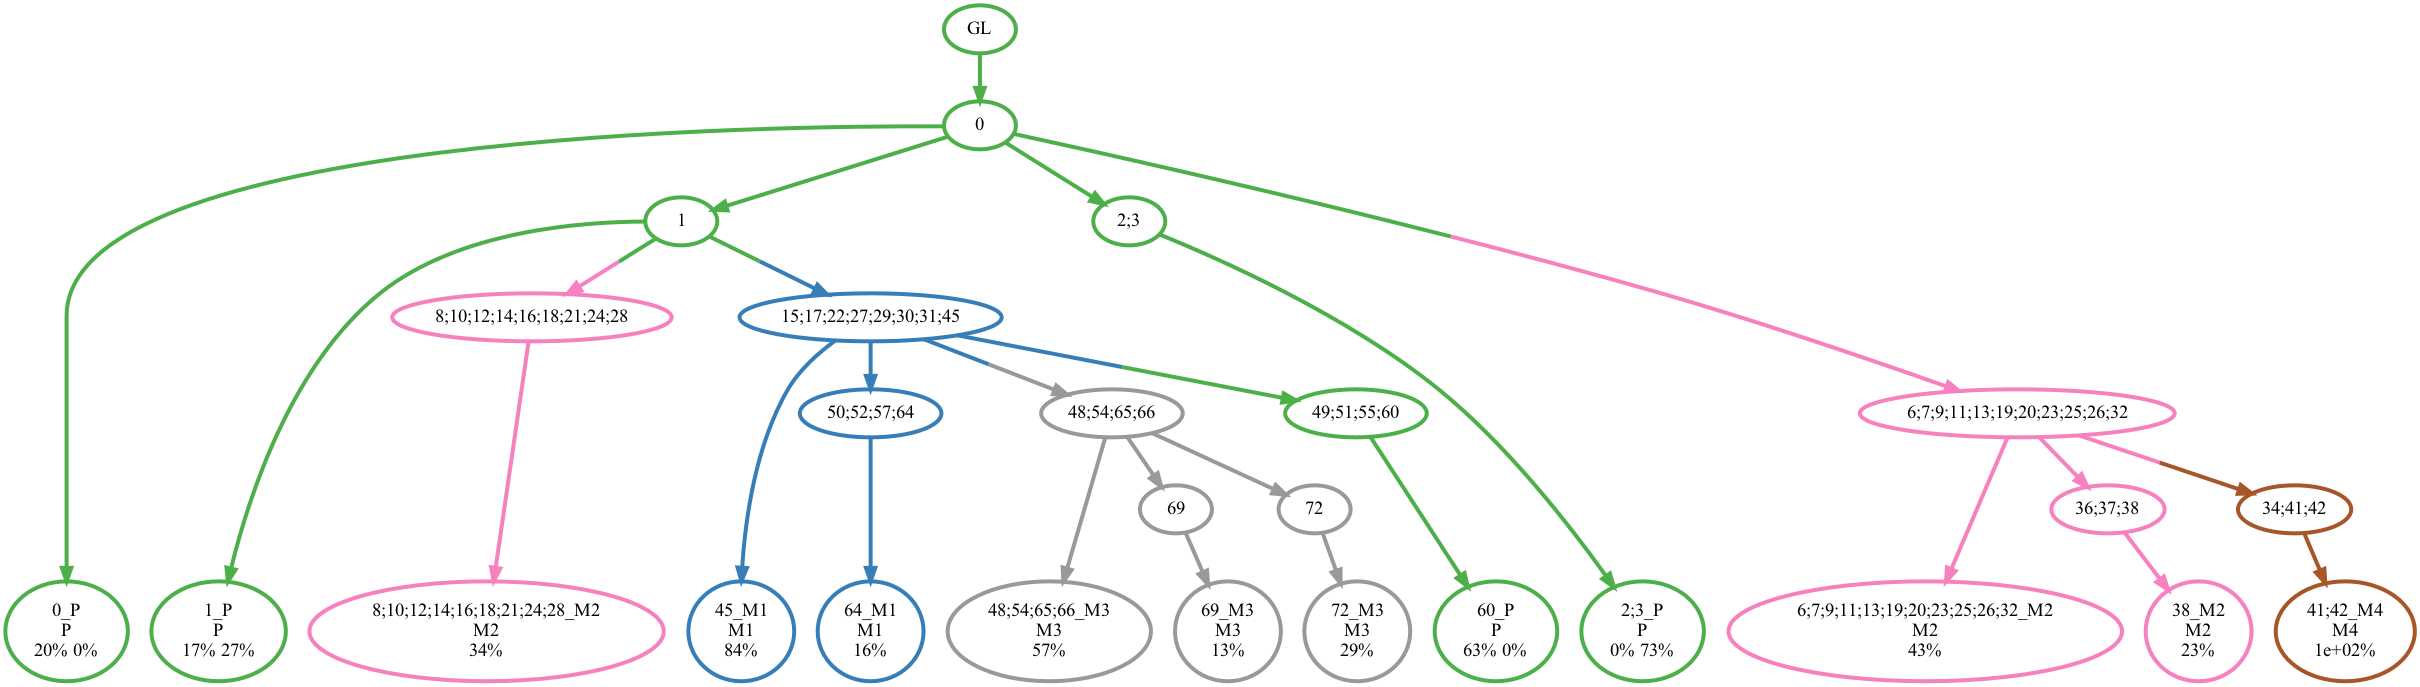

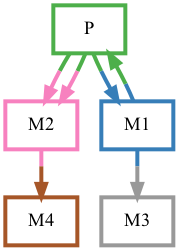

In [3]:
num_sites = "m5"
mig_type = "R"
SEED = 518
SIM_DATA_DIR = os.path.join(MACHINA_DATA_DIR, num_sites, mig_type)

print("Ground truth")
visualize_ground_truth(os.path.join(SIM_DATA_DIR, f"T_seed{SEED}.dot"), os.path.join(SIM_DATA_DIR, f"G_seed{SEED}.dot"))


num trees: 2
TREE 1
G
 None
{0: '0', 1: '1', 2: '2;3', 3: '6;7;9;11;13;19;20;23;25;26;32', 4: '8;10;12;14;16;18;21;24;28;36;37;38', 5: '34;41;42', 6: '15;17;22;27;29;30;31;45', 7: '49;51;55;60', 8: '50;52;57;64', 9: '48;54;65;66', 10: '69;72'}
['P', 'M1', 'M2', 'M3', 'M4']
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 50, lam1: 0.745, lam2: 0.255
epoch 50, lam1: 0.745, lam2: 0.255
epoch 50, lam1: 0.745, lam2: 0.255
epoch 50, lam1: 0.745, lam2: 0.255
epoch 50, lam1: 0.745, lam2: 0.255
epoch 5

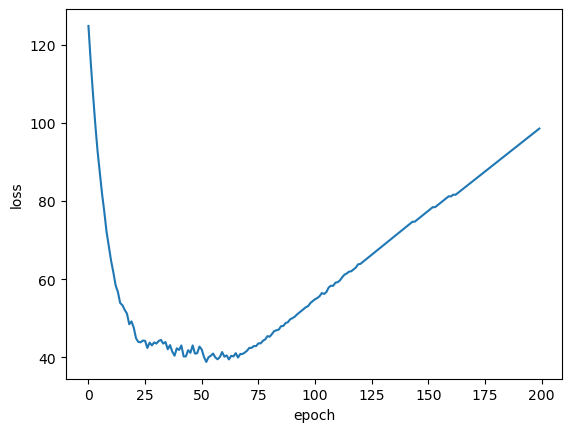

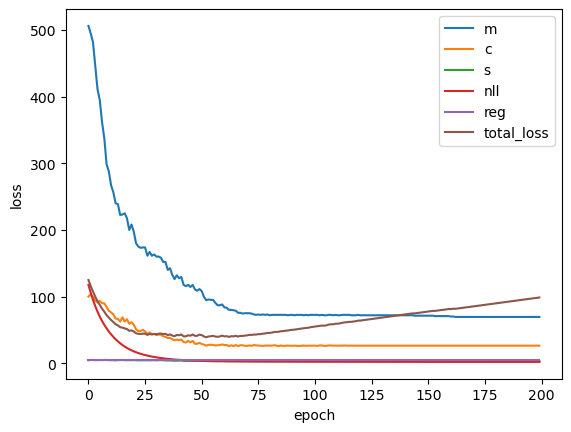

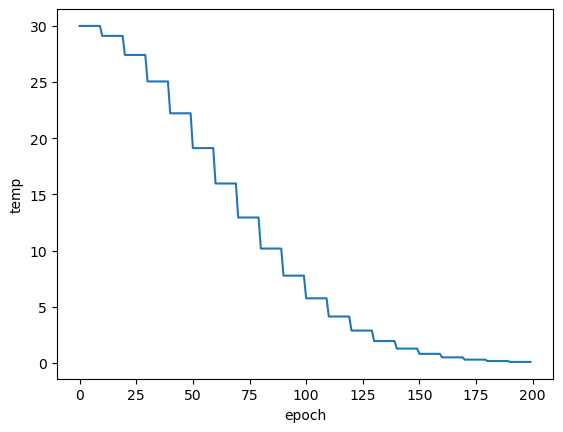

Time elapsed: 4.9909
============================== INTERMEDIATE TREE ==============================

Iteration: 0, Intermediate best tree idx 3
soft_X
                                        P    M1    M2    M3    M4
1                                  0.200 0.206 0.205 0.191 0.198
2;3                                0.191 0.190 0.214 0.201 0.204
6;7;9;11;13;19;20;23;25;26;32      0.189 0.228 0.193 0.195 0.196
8;10;12;14;16;18;21;24;28;36;37;38 0.195 0.204 0.197 0.200 0.204
34;41;42                           0.201 0.209 0.199 0.192 0.198
15;17;22;27;29;30;31;45            0.208 0.204 0.187 0.207 0.194
49;51;55;60                        0.208 0.208 0.191 0.207 0.185
50;52;57;64                        0.201 0.198 0.204 0.198 0.199
48;54;65;66                        0.196 0.204 0.211 0.195 0.194
69;72                              0.210 0.190 0.191 0.208 0.202
Migration number: 49.0
Comigration number: 19.0
Seeding site number: 4.0
Neg log likelihood: 116.891
Reg: 5.0
Loss: 710.891


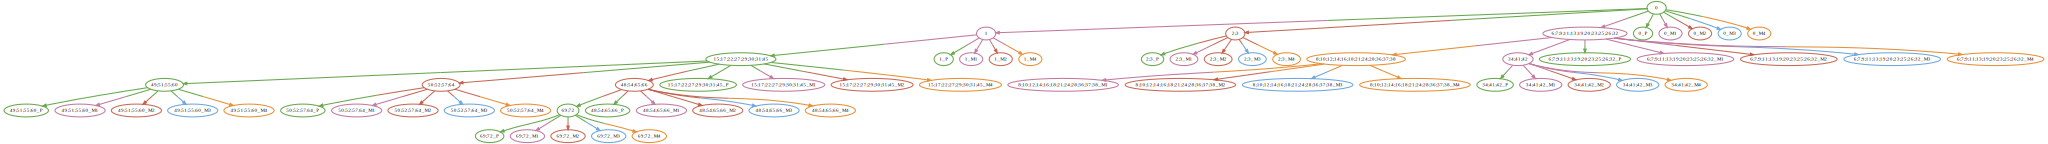

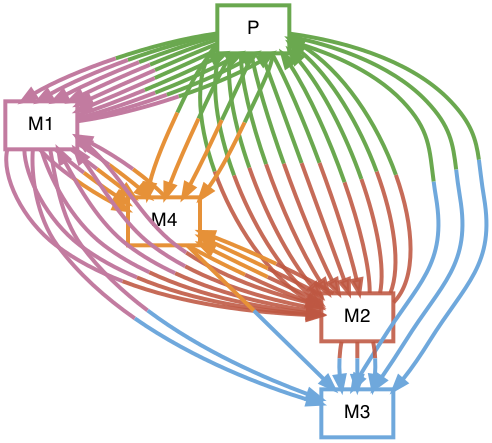

============================== INTERMEDIATE TREE ==============================

Iteration: 20, Intermediate best tree idx 3
soft_X
                                        P    M1    M2    M3    M4
1                                  0.199 0.203 0.221 0.187 0.190
2;3                                0.231 0.207 0.177 0.192 0.193
6;7;9;11;13;19;20;23;25;26;32      0.194 0.197 0.219 0.192 0.199
8;10;12;14;16;18;21;24;28;36;37;38 0.186 0.190 0.212 0.193 0.219
34;41;42                           0.185 0.221 0.204 0.186 0.204
15;17;22;27;29;30;31;45            0.189 0.215 0.199 0.208 0.189
49;51;55;60                        0.200 0.207 0.189 0.206 0.197
50;52;57;64                        0.203 0.206 0.181 0.209 0.201
48;54;65;66                        0.199 0.213 0.203 0.189 0.196
69;72                              0.212 0.203 0.193 0.203 0.189
Migration number: 22.0
Comigration number: 12.0
Seeding site number: 5.0
Neg log likelihood: 17.847
Reg: 5.0
Loss: 307.847


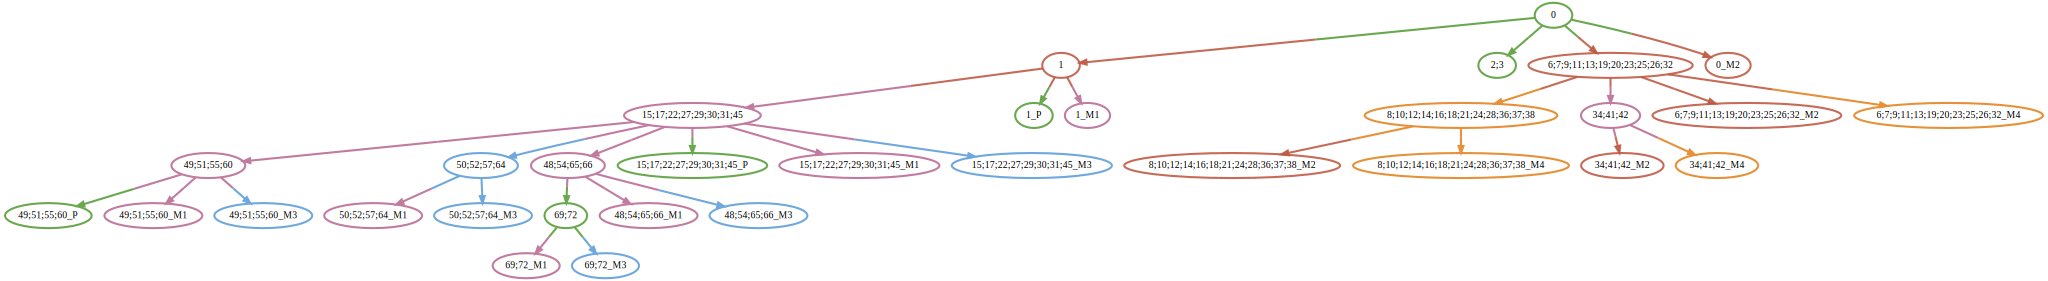

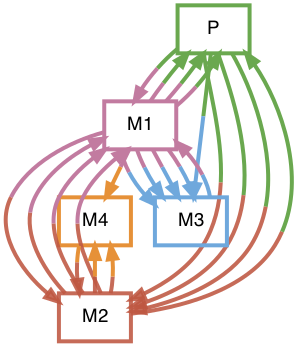

============================== INTERMEDIATE TREE ==============================

Iteration: 40, Intermediate best tree idx 3
soft_X
                                        P    M1    M2    M3    M4
1                                  0.243 0.205 0.194 0.165 0.193
2;3                                0.256 0.185 0.180 0.184 0.193
6;7;9;11;13;19;20;23;25;26;32      0.178 0.186 0.231 0.168 0.237
8;10;12;14;16;18;21;24;28;36;37;38 0.174 0.182 0.241 0.181 0.222
34;41;42                           0.192 0.191 0.220 0.171 0.226
15;17;22;27;29;30;31;45            0.192 0.214 0.182 0.218 0.194
49;51;55;60                        0.206 0.227 0.182 0.203 0.182
50;52;57;64                        0.200 0.223 0.174 0.217 0.186
48;54;65;66                        0.203 0.202 0.198 0.224 0.172
69;72                              0.181 0.218 0.191 0.232 0.178
Migration number: 12.0
Comigration number: 8.0
Seeding site number: 4.0
Neg log likelihood: 4.841
Reg: 5.0
Loss: 173.841


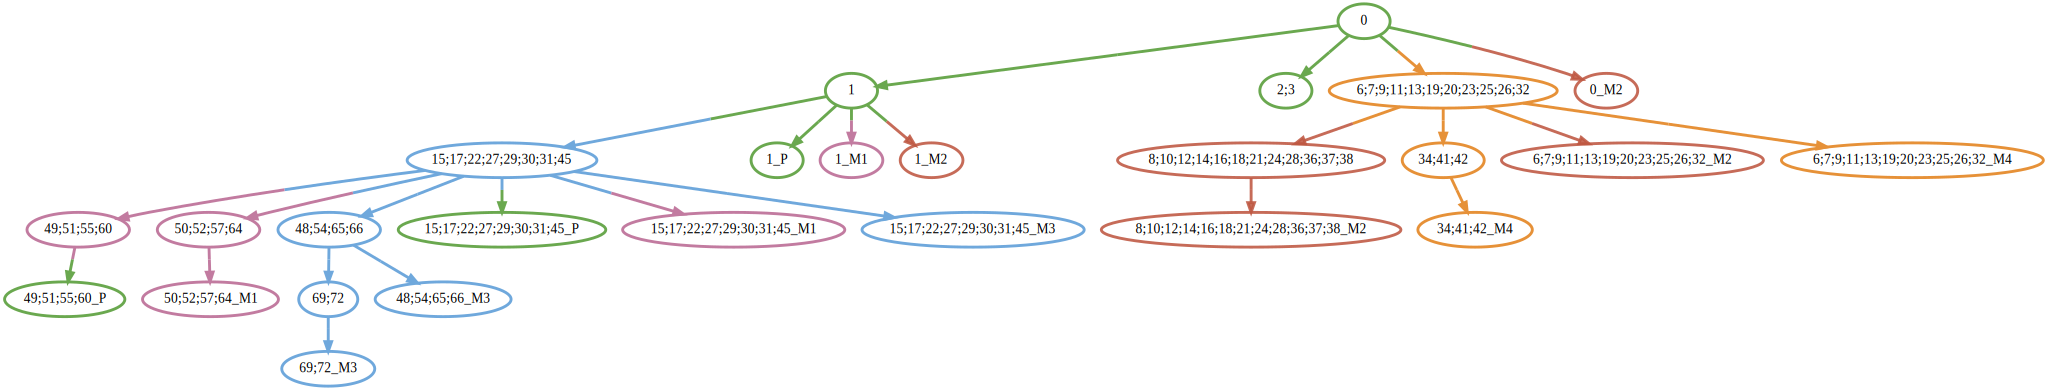

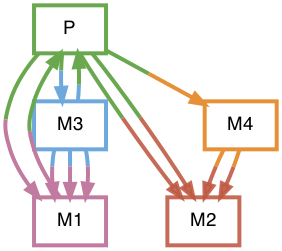

============================== INTERMEDIATE TREE ==============================

Iteration: 60, Intermediate best tree idx 3
soft_X
                                        P    M1    M2    M3    M4
1                                  0.306 0.202 0.201 0.142 0.149
2;3                                0.344 0.149 0.165 0.160 0.182
6;7;9;11;13;19;20;23;25;26;32      0.154 0.149 0.308 0.149 0.240
8;10;12;14;16;18;21;24;28;36;37;38 0.144 0.166 0.331 0.154 0.205
34;41;42                           0.144 0.189 0.245 0.157 0.265
15;17;22;27;29;30;31;45            0.191 0.285 0.144 0.228 0.153
49;51;55;60                        0.266 0.221 0.148 0.216 0.150
50;52;57;64                        0.159 0.284 0.154 0.218 0.185
48;54;65;66                        0.161 0.255 0.164 0.272 0.149
69;72                              0.183 0.221 0.145 0.303 0.148
Migration number: 8.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 2.797
Reg: 5.0
Loss: 115.797


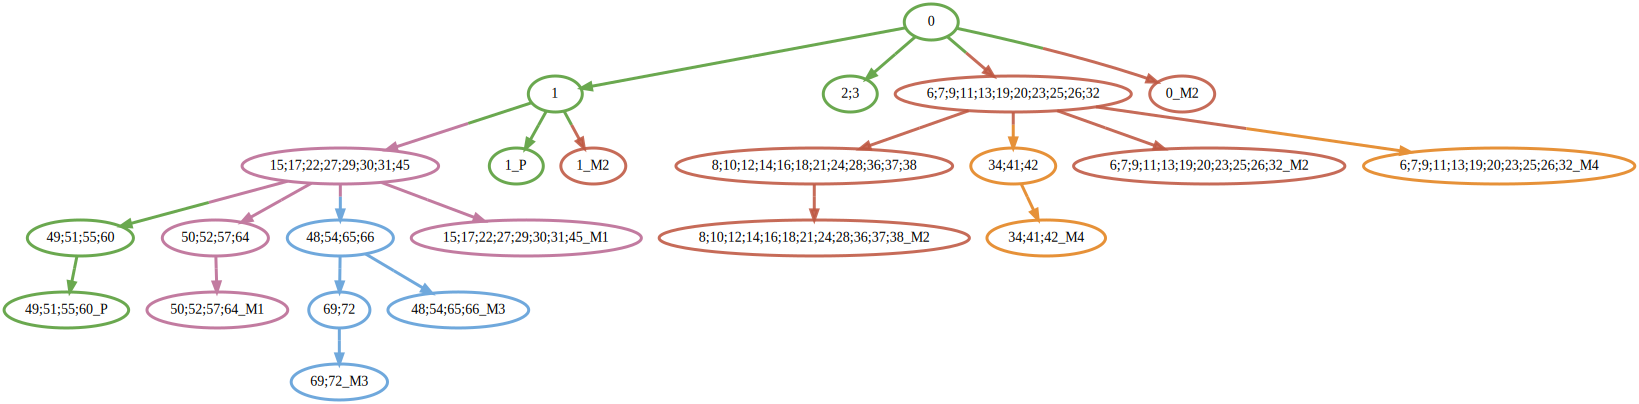

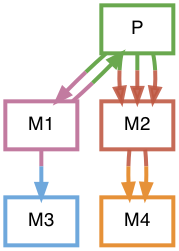

============================== INTERMEDIATE TREE ==============================

Iteration: 80, Intermediate best tree idx 3
soft_X
                                        P    M1    M2    M3    M4
1                                  0.406 0.124 0.223 0.087 0.160
2;3                                0.552 0.117 0.106 0.118 0.107
6;7;9;11;13;19;20;23;25;26;32      0.088 0.093 0.399 0.073 0.348
8;10;12;14;16;18;21;24;28;36;37;38 0.098 0.124 0.455 0.110 0.212
34;41;42                           0.104 0.110 0.252 0.103 0.432
15;17;22;27;29;30;31;45            0.142 0.453 0.092 0.208 0.105
49;51;55;60                        0.358 0.278 0.099 0.174 0.091
50;52;57;64                        0.115 0.481 0.091 0.204 0.108
48;54;65;66                        0.117 0.232 0.113 0.437 0.101
69;72                              0.118 0.168 0.105 0.491 0.118
Migration number: 7.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 2.322
Reg: 4.999999523162842
Loss: 105.322


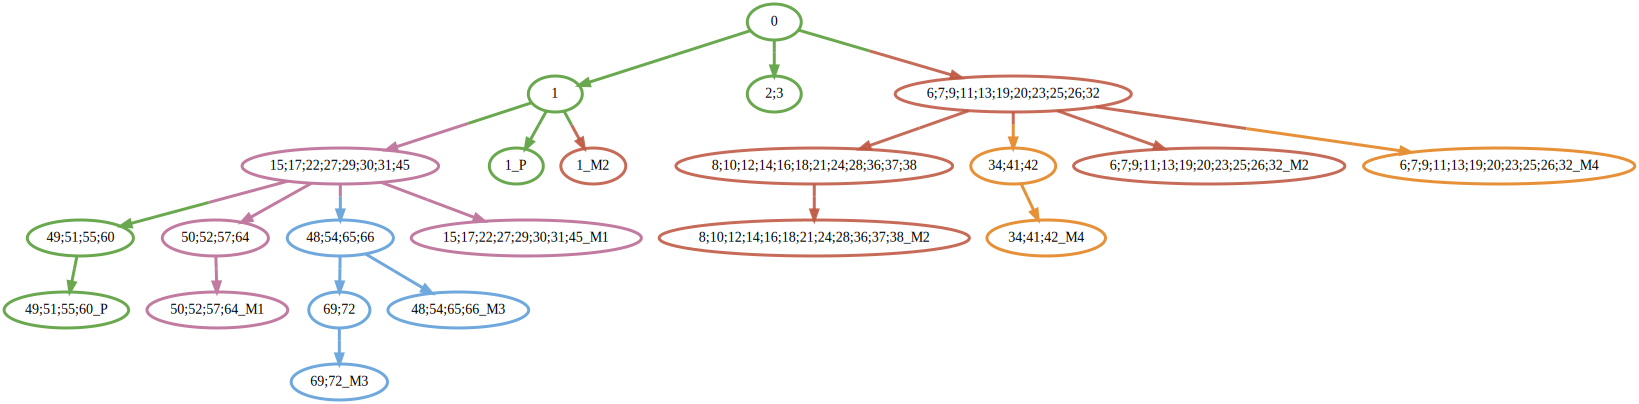

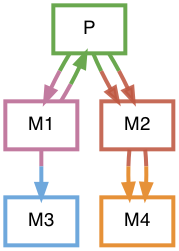

============================== INTERMEDIATE TREE ==============================

Iteration: 100, Intermediate best tree idx 3
soft_X
                                        P    M1    M2    M3    M4
1                                  0.810 0.052 0.089 0.024 0.024
2;3                                0.871 0.032 0.027 0.030 0.039
6;7;9;11;13;19;20;23;25;26;32      0.022 0.036 0.649 0.023 0.269
8;10;12;14;16;18;21;24;28;36;37;38 0.032 0.027 0.845 0.031 0.065
34;41;42                           0.042 0.049 0.208 0.038 0.663
15;17;22;27;29;30;31;45            0.059 0.753 0.040 0.105 0.043
49;51;55;60                        0.724 0.147 0.026 0.075 0.027
50;52;57;64                        0.034 0.824 0.030 0.082 0.031
48;54;65;66                        0.041 0.085 0.032 0.814 0.028
69;72                              0.045 0.055 0.020 0.848 0.032
Migration number: 7.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 2.127
Reg: 5.0
Loss: 105.127


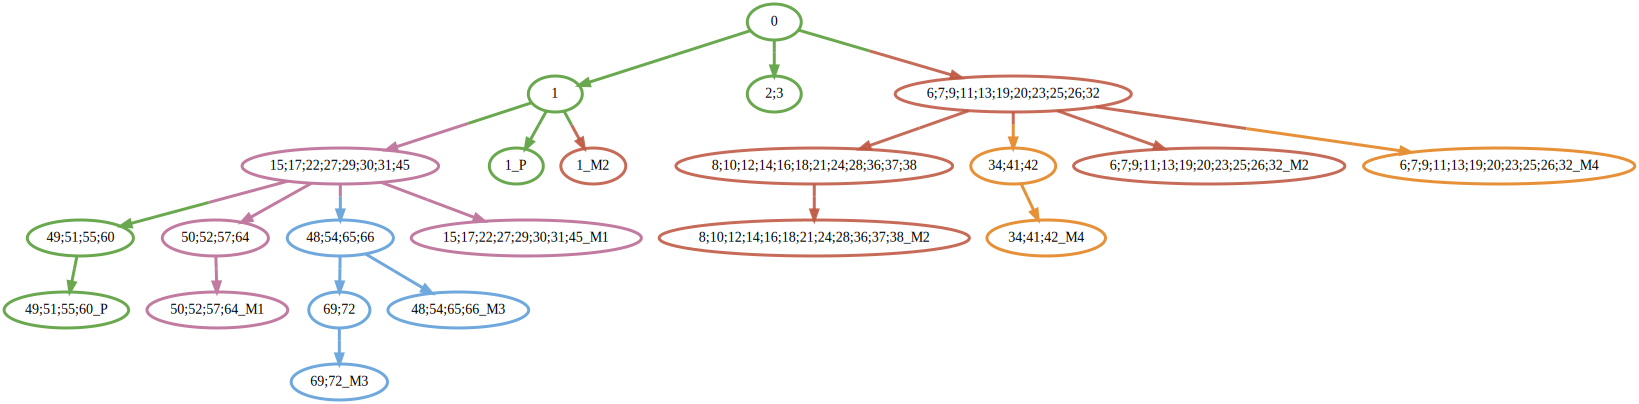

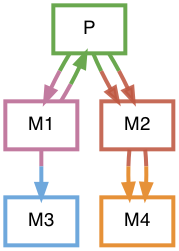

============================== INTERMEDIATE TREE ==============================

Iteration: 120, Intermediate best tree idx 3
soft_X
                                        P    M1    M2    M3    M4
1                                  0.988 0.005 0.005 0.001 0.001
2;3                                0.997 0.001 0.001 0.001 0.001
6;7;9;11;13;19;20;23;25;26;32      0.001 0.001 0.892 0.001 0.105
8;10;12;14;16;18;21;24;28;36;37;38 0.001 0.001 0.995 0.001 0.002
34;41;42                           0.002 0.002 0.018 0.001 0.977
15;17;22;27;29;30;31;45            0.001 0.994 0.000 0.004 0.001
49;51;55;60                        0.988 0.009 0.001 0.002 0.000
50;52;57;64                        0.001 0.996 0.000 0.003 0.000
48;54;65;66                        0.002 0.004 0.001 0.992 0.001
69;72                              0.001 0.002 0.001 0.996 0.001
Migration number: 7.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 2.01
Reg: 5.0
Loss: 105.01


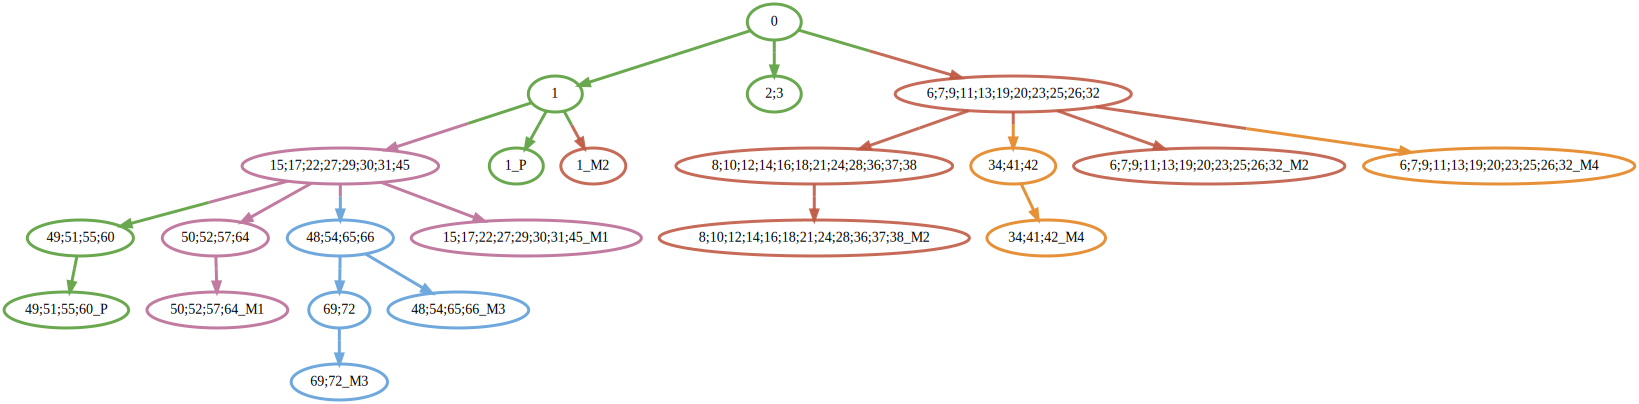

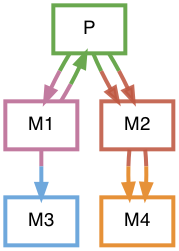

============================== INTERMEDIATE TREE ==============================

Iteration: 140, Intermediate best tree idx 3
soft_X
                                        P    M1    M2    M3    M4
1                                  1.000 0.000 0.000 0.000 0.000
2;3                                1.000 0.000 0.000 0.000 0.000
6;7;9;11;13;19;20;23;25;26;32      0.000 0.000 1.000 0.000 0.000
8;10;12;14;16;18;21;24;28;36;37;38 0.000 0.000 1.000 0.000 0.000
34;41;42                           0.000 0.000 0.000 0.000 1.000
15;17;22;27;29;30;31;45            0.000 1.000 0.000 0.000 0.000
49;51;55;60                        1.000 0.000 0.000 0.000 0.000
50;52;57;64                        0.000 1.000 0.000 0.000 0.000
48;54;65;66                        0.000 0.000 0.000 1.000 0.000
69;72                              0.000 0.000 0.000 1.000 0.000
Migration number: 7.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 1.936
Reg: 5.0
Loss: 104.936


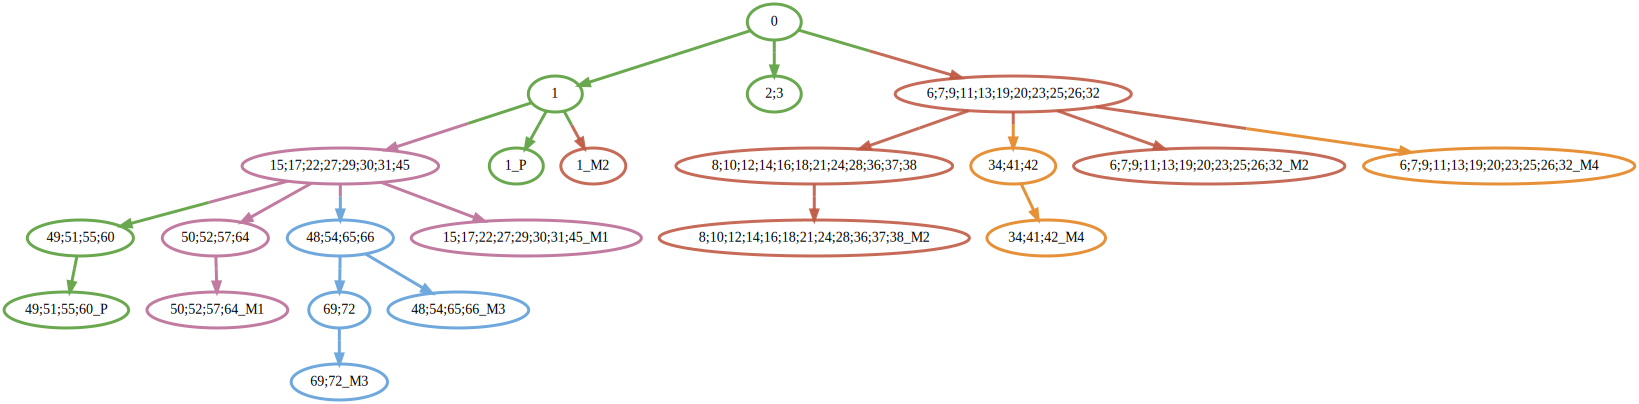

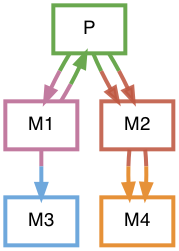

============================== INTERMEDIATE TREE ==============================

Iteration: 160, Intermediate best tree idx 3
soft_X
                                        P    M1    M2    M3    M4
1                                  1.000 0.000 0.000 0.000 0.000
2;3                                1.000 0.000 0.000 0.000 0.000
6;7;9;11;13;19;20;23;25;26;32      0.000 0.000 1.000 0.000 0.000
8;10;12;14;16;18;21;24;28;36;37;38 0.000 0.000 1.000 0.000 0.000
34;41;42                           0.000 0.000 0.000 0.000 1.000
15;17;22;27;29;30;31;45            0.000 1.000 0.000 0.000 0.000
49;51;55;60                        1.000 0.000 0.000 0.000 0.000
50;52;57;64                        0.000 1.000 0.000 0.000 0.000
48;54;65;66                        0.000 0.000 0.000 1.000 0.000
69;72                              0.000 0.000 0.000 1.000 0.000
Migration number: 6.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 1.887
Reg: 5.0
Loss: 94.887


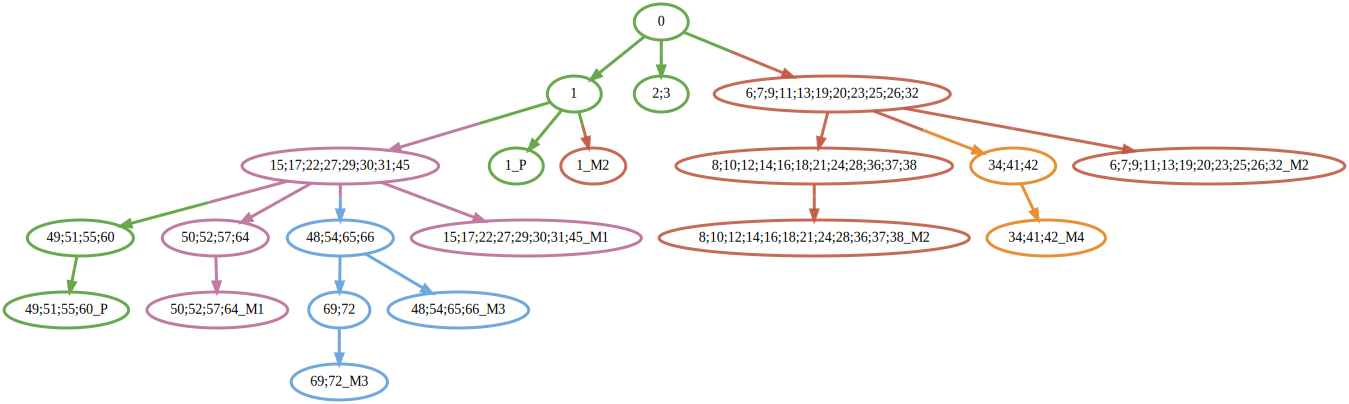

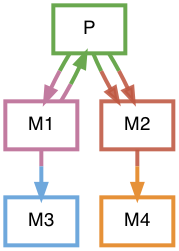

============================== INTERMEDIATE TREE ==============================

Iteration: 180, Intermediate best tree idx 3
soft_X
                                        P    M1    M2    M3    M4
1                                  1.000 0.000 0.000 0.000 0.000
2;3                                1.000 0.000 0.000 0.000 0.000
6;7;9;11;13;19;20;23;25;26;32      0.000 0.000 1.000 0.000 0.000
8;10;12;14;16;18;21;24;28;36;37;38 0.000 0.000 1.000 0.000 0.000
34;41;42                           0.000 0.000 0.000 0.000 1.000
15;17;22;27;29;30;31;45            0.000 1.000 0.000 0.000 0.000
49;51;55;60                        1.000 0.000 0.000 0.000 0.000
50;52;57;64                        0.000 1.000 0.000 0.000 0.000
48;54;65;66                        0.000 0.000 0.000 1.000 0.000
69;72                              0.000 0.000 0.000 1.000 0.000
Migration number: 6.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 1.857
Reg: 5.0
Loss: 94.857


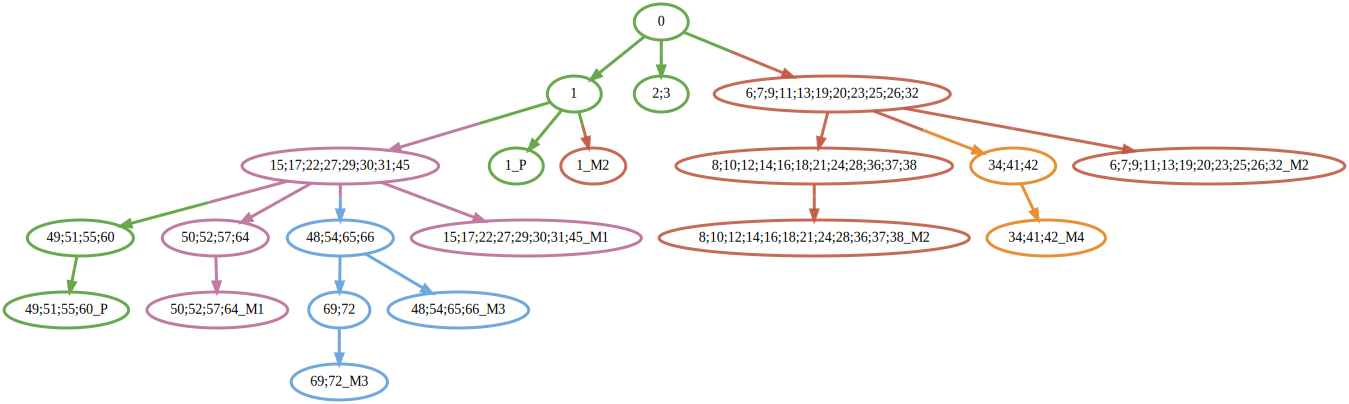

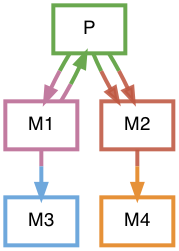

****************************** BEST TREE ******************************

Migration number: 6.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 1.376
Reg: 4.77186393737793
Loss: 94.148


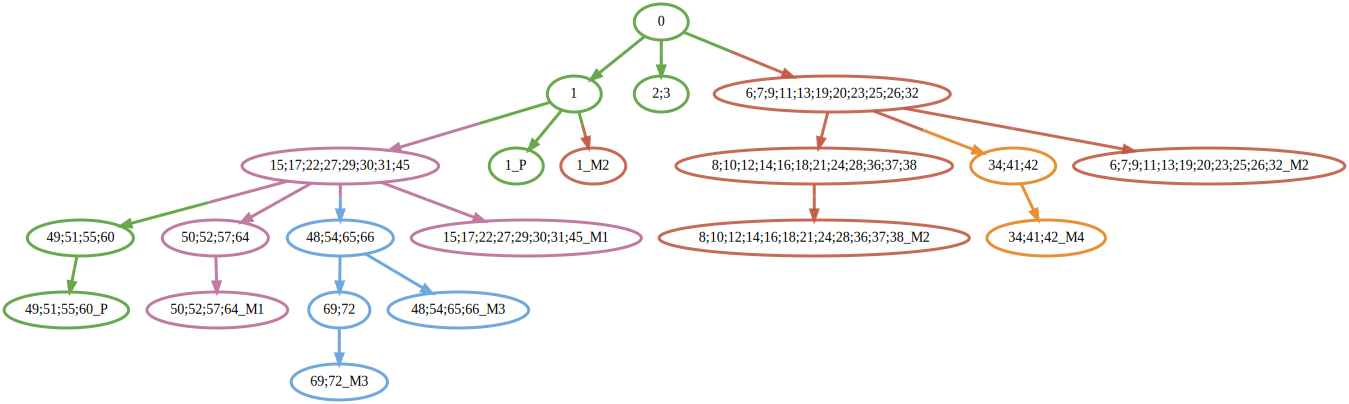

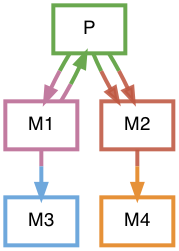

****************************************************************************************************
TREE 2
G
 None
{0: '0', 1: '1', 2: '2;3', 3: '6;7;9;11;13;19;20;23;25;26;32', 4: '8;10;12;14;16;18;21;24;28;36;37;38', 5: '34;41;42', 6: '15;17;22;27;29;30;31;45', 7: '49;51;55;60', 8: '50;52;57;64', 9: '48;54;65;66', 10: '69;72'}
['P', 'M1', 'M2', 'M3', 'M4']
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 0, lam1: 0.995, lam2: 0.005
epoch 50, lam1: 0.745, lam2: 0.255
epoch 50, lam1: 0.745, lam2: 0.255
epoch 50, lam1: 0.745, l

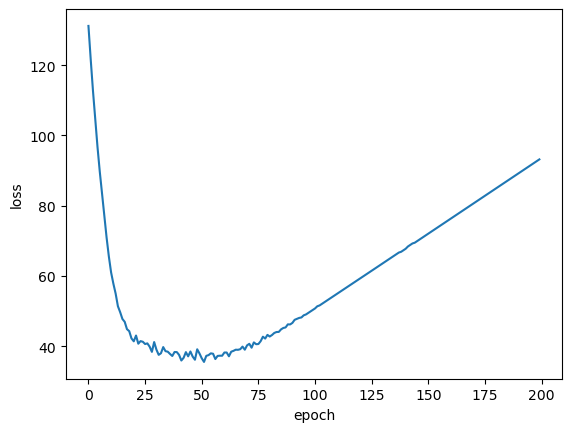

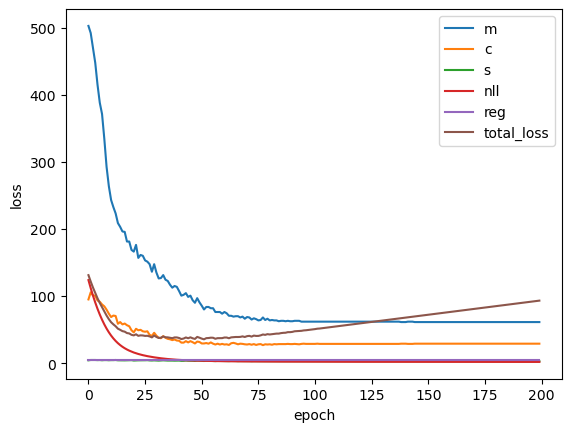

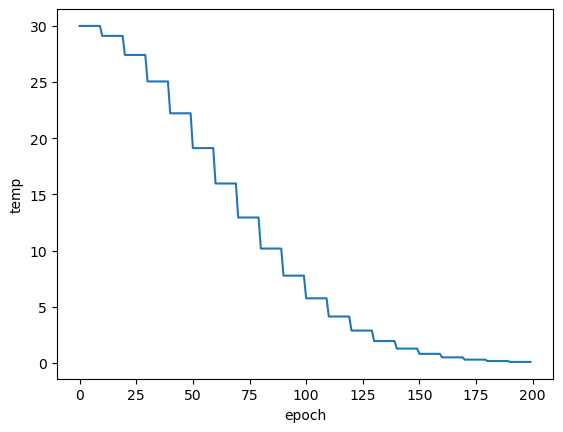

Time elapsed: 4.573034
============================== INTERMEDIATE TREE ==============================

Iteration: 0, Intermediate best tree idx 14
soft_X
                                        P    M1    M2    M3    M4
1                                  0.191 0.200 0.211 0.196 0.201
2;3                                0.197 0.196 0.195 0.206 0.206
6;7;9;11;13;19;20;23;25;26;32      0.199 0.196 0.196 0.206 0.202
8;10;12;14;16;18;21;24;28;36;37;38 0.190 0.207 0.199 0.203 0.201
34;41;42                           0.214 0.208 0.199 0.187 0.192
15;17;22;27;29;30;31;45            0.203 0.205 0.198 0.197 0.198
49;51;55;60                        0.212 0.198 0.199 0.197 0.193
50;52;57;64                        0.197 0.204 0.195 0.206 0.198
48;54;65;66                        0.204 0.206 0.193 0.199 0.198
69;72                              0.206 0.196 0.193 0.195 0.210
Migration number: 52.0
Comigration number: 22.0
Seeding site number: 5.0
Neg log likelihood: 113.813
Reg: 5.0
Loss: 753.813


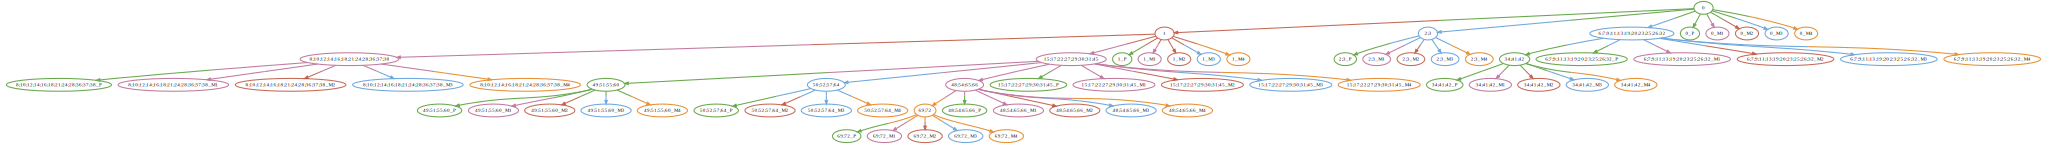

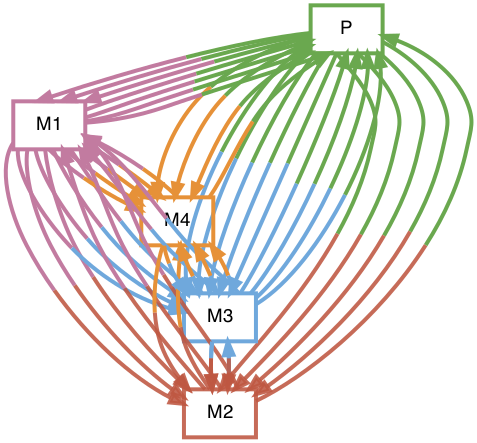

============================== INTERMEDIATE TREE ==============================

Iteration: 20, Intermediate best tree idx 14
soft_X
                                        P    M1    M2    M3    M4
1                                  0.230 0.189 0.200 0.190 0.190
2;3                                0.224 0.211 0.184 0.186 0.195
6;7;9;11;13;19;20;23;25;26;32      0.196 0.217 0.198 0.189 0.200
8;10;12;14;16;18;21;24;28;36;37;38 0.198 0.189 0.217 0.197 0.199
34;41;42                           0.203 0.185 0.204 0.210 0.198
15;17;22;27;29;30;31;45            0.212 0.203 0.191 0.203 0.192
49;51;55;60                        0.203 0.199 0.174 0.220 0.205
50;52;57;64                        0.190 0.202 0.194 0.213 0.201
48;54;65;66                        0.192 0.221 0.183 0.201 0.203
69;72                              0.192 0.211 0.186 0.206 0.204
Migration number: 17.0
Comigration number: 10.0
Seeding site number: 3.0
Neg log likelihood: 13.797
Reg: 5.0
Loss: 241.797


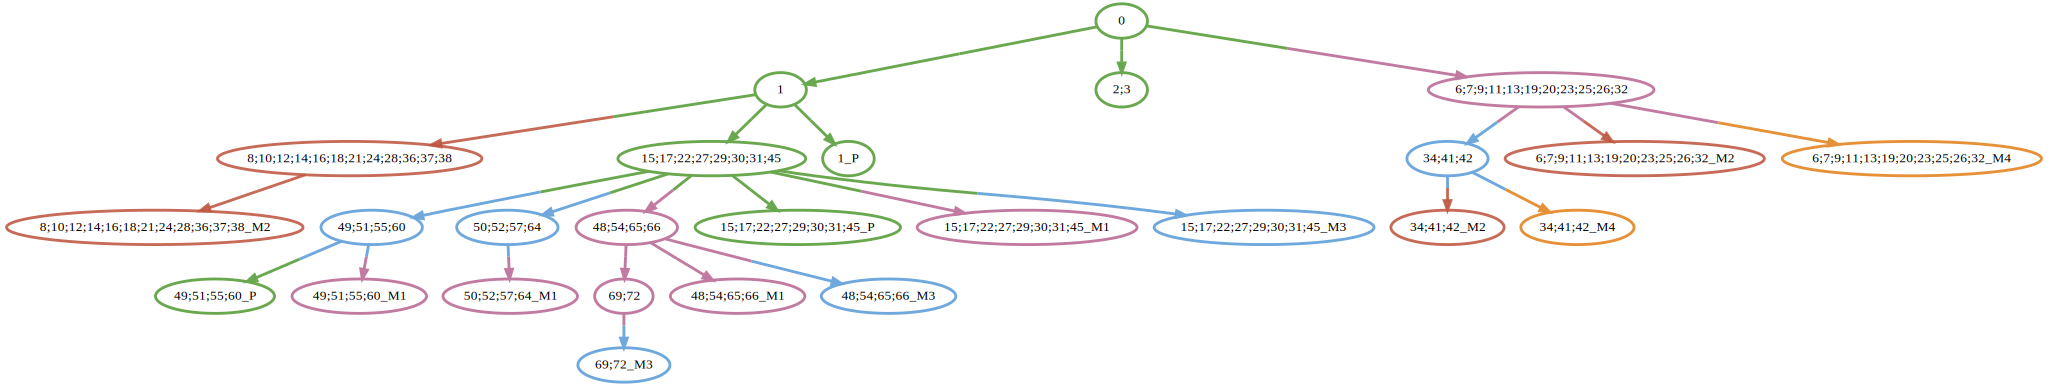

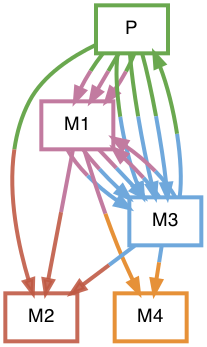

============================== INTERMEDIATE TREE ==============================

Iteration: 40, Intermediate best tree idx 14
soft_X
                                        P    M1    M2    M3    M4
1                                  0.246 0.181 0.208 0.184 0.181
2;3                                0.247 0.196 0.179 0.181 0.198
6;7;9;11;13;19;20;23;25;26;32      0.207 0.166 0.225 0.177 0.223
8;10;12;14;16;18;21;24;28;36;37;38 0.188 0.158 0.268 0.177 0.210
34;41;42                           0.165 0.183 0.266 0.169 0.218
15;17;22;27;29;30;31;45            0.227 0.210 0.169 0.220 0.174
49;51;55;60                        0.222 0.228 0.158 0.198 0.194
50;52;57;64                        0.190 0.209 0.204 0.220 0.178
48;54;65;66                        0.186 0.223 0.169 0.223 0.198
69;72                              0.176 0.242 0.160 0.231 0.191
Migration number: 13.0
Comigration number: 7.0
Seeding site number: 4.0
Neg log likelihood: 4.192
Reg: 4.999999523162842
Loss: 178.192


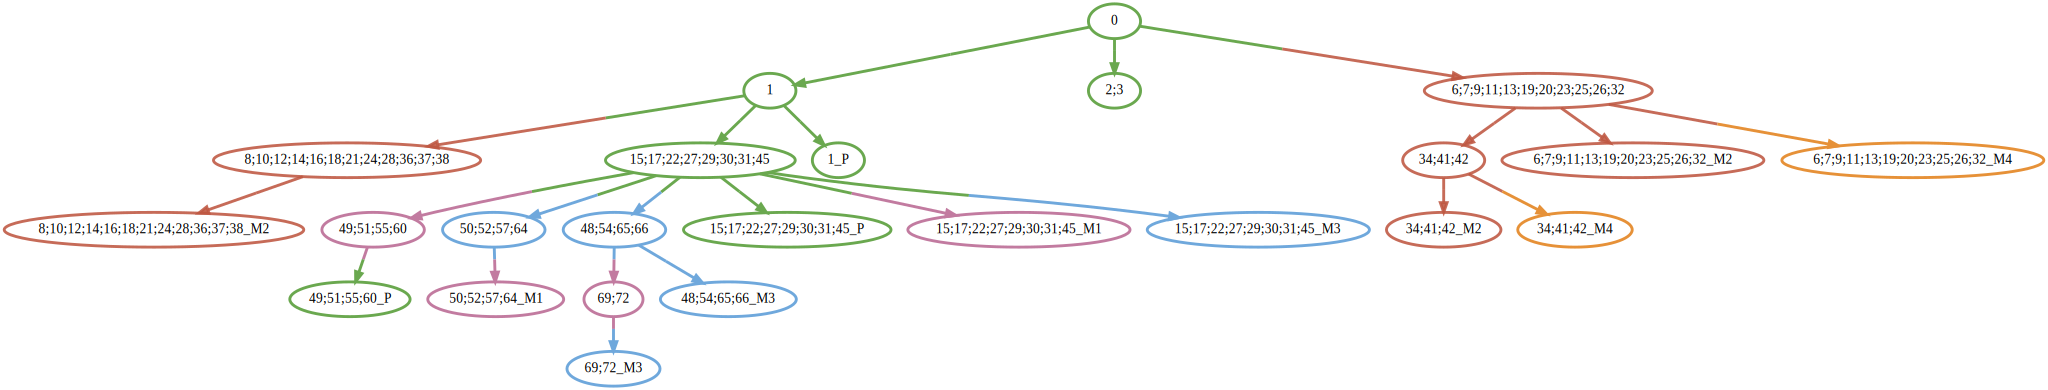

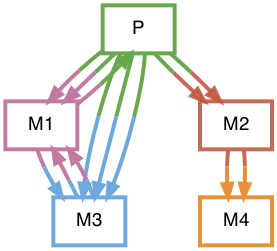

============================== INTERMEDIATE TREE ==============================

Iteration: 60, Intermediate best tree idx 14
soft_X
                                        P    M1    M2    M3    M4
1                                  0.329 0.171 0.181 0.162 0.157
2;3                                0.360 0.170 0.149 0.165 0.156
6;7;9;11;13;19;20;23;25;26;32      0.161 0.146 0.279 0.160 0.254
8;10;12;14;16;18;21;24;28;36;37;38 0.236 0.168 0.295 0.151 0.150
34;41;42                           0.145 0.157 0.283 0.152 0.263
15;17;22;27;29;30;31;45            0.280 0.239 0.140 0.190 0.151
49;51;55;60                        0.274 0.231 0.137 0.187 0.171
50;52;57;64                        0.191 0.299 0.163 0.205 0.142
48;54;65;66                        0.169 0.265 0.145 0.250 0.170
69;72                              0.155 0.261 0.146 0.267 0.170
Migration number: 9.0
Comigration number: 4.0
Seeding site number: 3.0
Neg log likelihood: 2.742
Reg: 5.0
Loss: 120.742


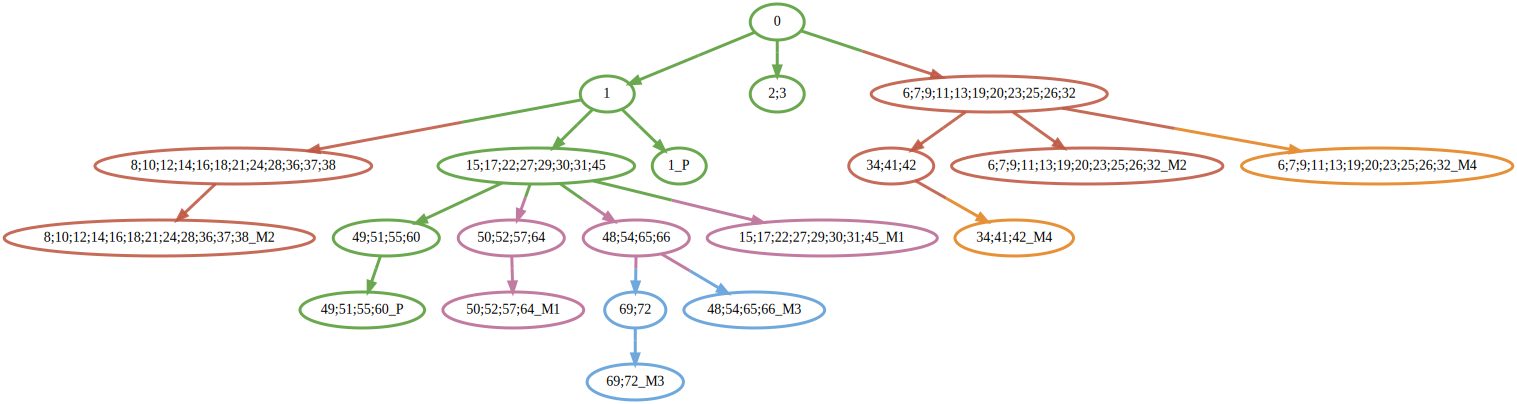

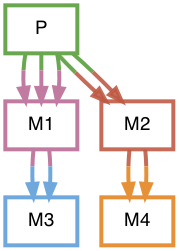

============================== INTERMEDIATE TREE ==============================

Iteration: 80, Intermediate best tree idx 14
soft_X
                                        P    M1    M2    M3    M4
1                                  0.541 0.099 0.120 0.120 0.120
2;3                                0.584 0.120 0.091 0.097 0.109
6;7;9;11;13;19;20;23;25;26;32      0.117 0.072 0.349 0.079 0.383
8;10;12;14;16;18;21;24;28;36;37;38 0.222 0.106 0.474 0.093 0.104
34;41;42                           0.092 0.106 0.335 0.120 0.347
15;17;22;27;29;30;31;45            0.328 0.301 0.105 0.142 0.124
49;51;55;60                        0.481 0.172 0.083 0.152 0.113
50;52;57;64                        0.160 0.455 0.119 0.157 0.110
48;54;65;66                        0.127 0.248 0.106 0.398 0.121
69;72                              0.108 0.226 0.089 0.462 0.115
Migration number: 6.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 2.322
Reg: 5.0
Loss: 94.322


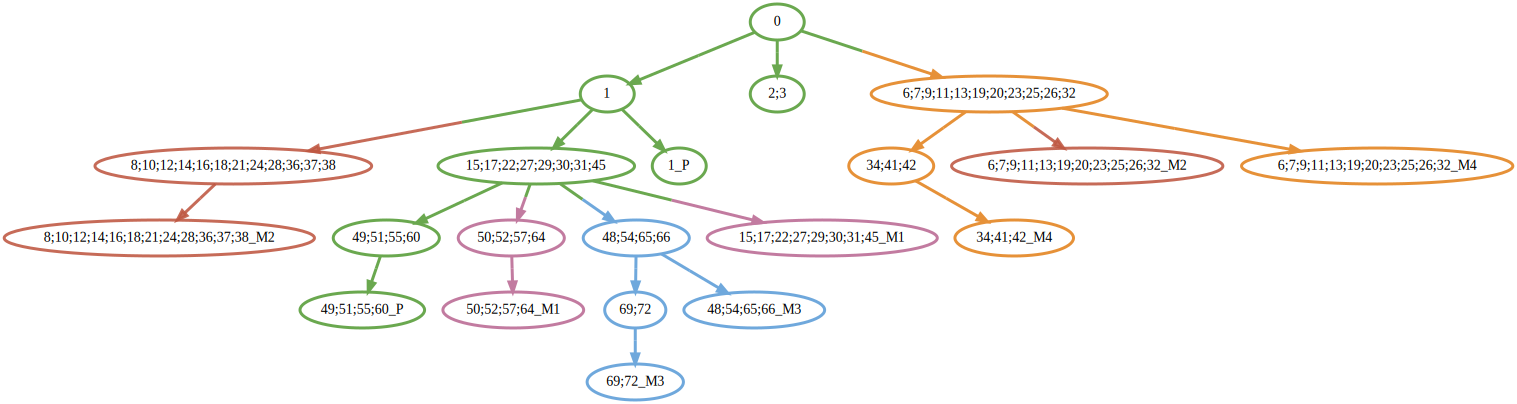

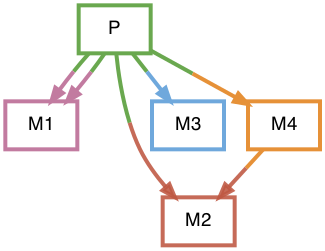

============================== INTERMEDIATE TREE ==============================

Iteration: 100, Intermediate best tree idx 14
soft_X
                                        P    M1    M2    M3    M4
1                                  0.906 0.016 0.029 0.022 0.027
2;3                                0.850 0.041 0.039 0.029 0.042
6;7;9;11;13;19;20;23;25;26;32      0.035 0.020 0.282 0.027 0.637
8;10;12;14;16;18;21;24;28;36;37;38 0.124 0.025 0.782 0.034 0.035
34;41;42                           0.040 0.027 0.206 0.035 0.692
15;17;22;27;29;30;31;45            0.567 0.294 0.029 0.067 0.043
49;51;55;60                        0.811 0.064 0.022 0.060 0.043
50;52;57;64                        0.109 0.775 0.036 0.054 0.026
48;54;65;66                        0.052 0.145 0.031 0.725 0.048
69;72                              0.033 0.109 0.025 0.778 0.055
Migration number: 6.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 2.132
Reg: 5.0
Loss: 94.132


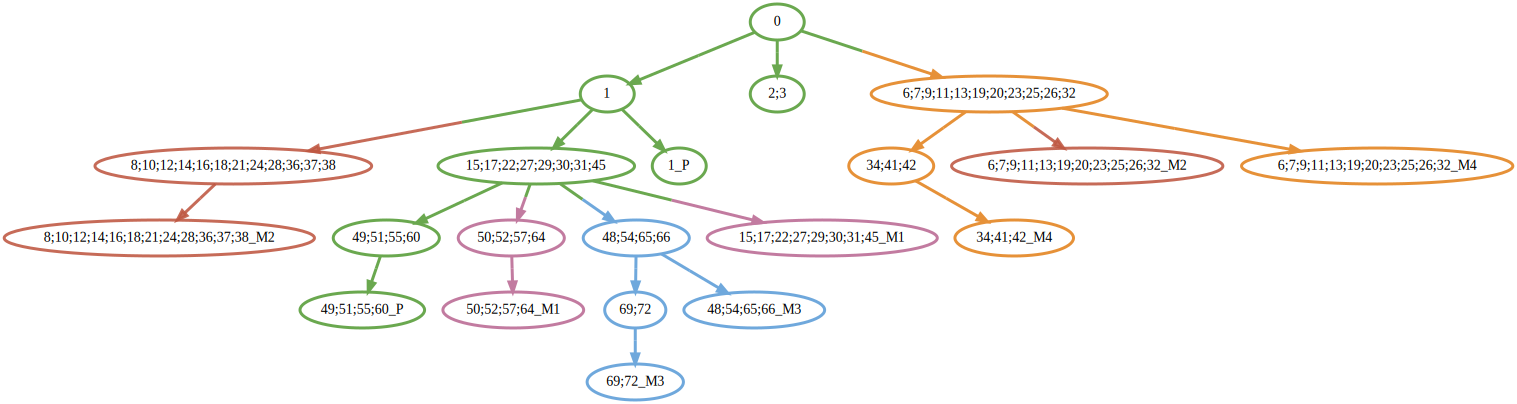

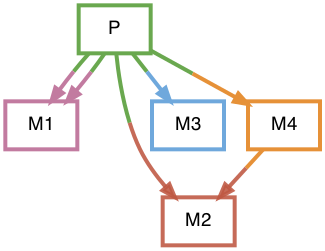

============================== INTERMEDIATE TREE ==============================

Iteration: 120, Intermediate best tree idx 14
soft_X
                                        P    M1    M2    M3    M4
1                                  0.998 0.000 0.001 0.000 0.000
2;3                                0.997 0.001 0.000 0.001 0.001
6;7;9;11;13;19;20;23;25;26;32      0.001 0.001 0.032 0.001 0.965
8;10;12;14;16;18;21;24;28;36;37;38 0.006 0.000 0.992 0.000 0.001
34;41;42                           0.001 0.000 0.033 0.001 0.965
15;17;22;27;29;30;31;45            0.956 0.035 0.001 0.006 0.002
49;51;55;60                        0.994 0.002 0.001 0.002 0.001
50;52;57;64                        0.008 0.987 0.001 0.004 0.001
48;54;65;66                        0.001 0.005 0.000 0.994 0.000
69;72                              0.001 0.005 0.001 0.992 0.002
Migration number: 6.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 2.02
Reg: 4.999999523162842
Loss: 94.02


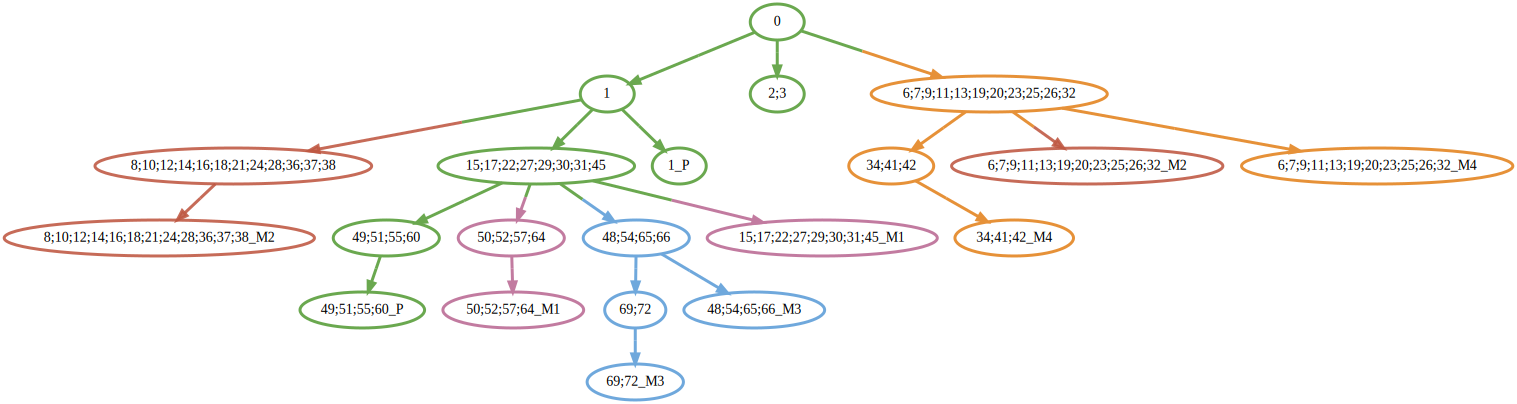

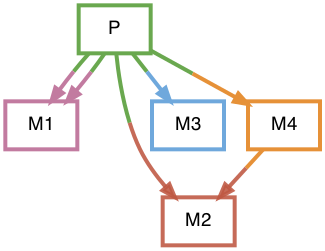

============================== INTERMEDIATE TREE ==============================

Iteration: 140, Intermediate best tree idx 14
soft_X
                                        P    M1    M2    M3    M4
1                                  1.000 0.000 0.000 0.000 0.000
2;3                                1.000 0.000 0.000 0.000 0.000
6;7;9;11;13;19;20;23;25;26;32      0.000 0.000 0.000 0.000 1.000
8;10;12;14;16;18;21;24;28;36;37;38 0.000 0.000 1.000 0.000 0.000
34;41;42                           0.000 0.000 0.000 0.000 1.000
15;17;22;27;29;30;31;45            1.000 0.000 0.000 0.000 0.000
49;51;55;60                        1.000 0.000 0.000 0.000 0.000
50;52;57;64                        0.000 1.000 0.000 0.000 0.000
48;54;65;66                        0.000 0.000 0.000 1.000 0.000
69;72                              0.000 0.000 0.000 1.000 0.000
Migration number: 6.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 1.946
Reg: 5.0
Loss: 93.946


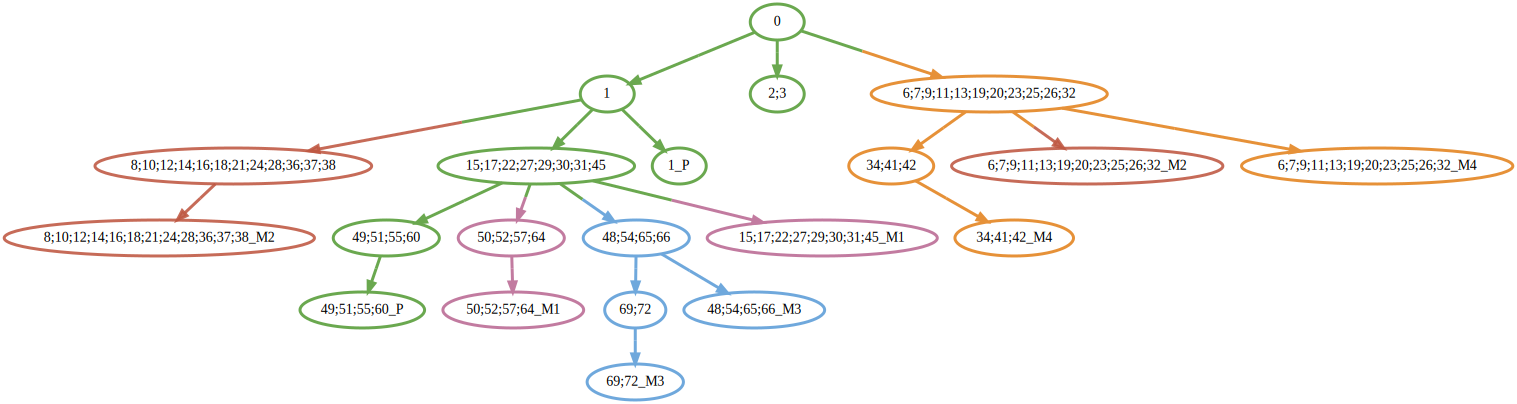

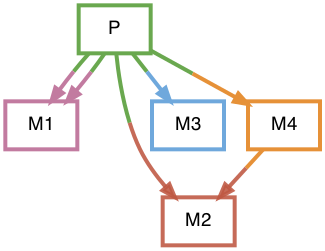

============================== INTERMEDIATE TREE ==============================

Iteration: 160, Intermediate best tree idx 14
soft_X
                                        P    M1    M2    M3    M4
1                                  1.000 0.000 0.000 0.000 0.000
2;3                                1.000 0.000 0.000 0.000 0.000
6;7;9;11;13;19;20;23;25;26;32      0.000 0.000 0.000 0.000 1.000
8;10;12;14;16;18;21;24;28;36;37;38 0.000 0.000 1.000 0.000 0.000
34;41;42                           0.000 0.000 0.000 0.000 1.000
15;17;22;27;29;30;31;45            1.000 0.000 0.000 0.000 0.000
49;51;55;60                        1.000 0.000 0.000 0.000 0.000
50;52;57;64                        0.000 1.000 0.000 0.000 0.000
48;54;65;66                        0.000 0.000 0.000 1.000 0.000
69;72                              0.000 0.000 0.000 1.000 0.000
Migration number: 6.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 1.898
Reg: 4.999999523162842
Loss: 93.898


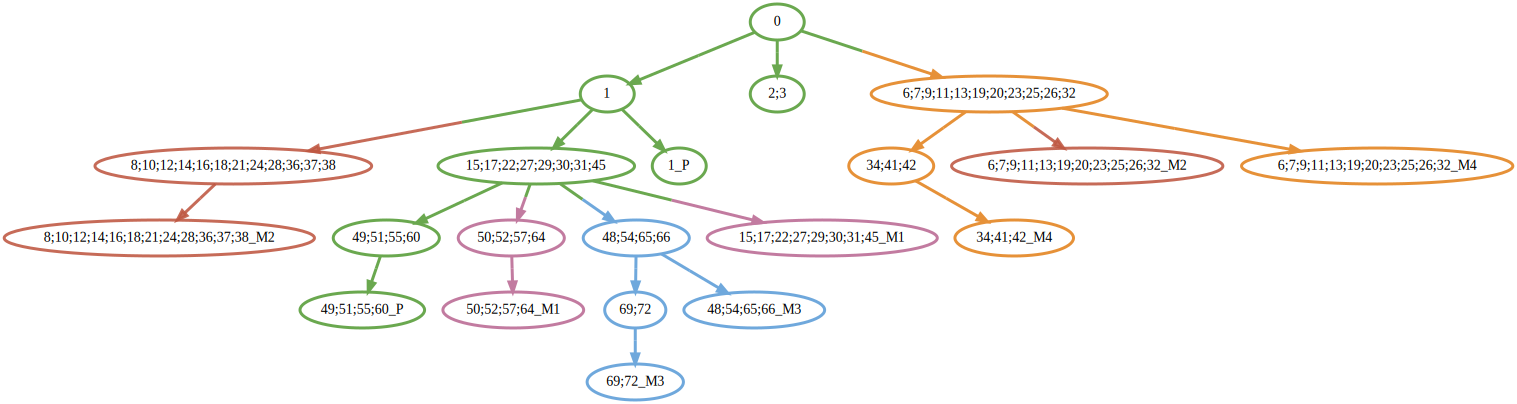

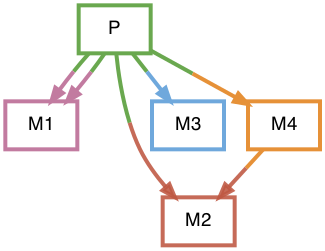

============================== INTERMEDIATE TREE ==============================

Iteration: 180, Intermediate best tree idx 14
soft_X
                                        P    M1    M2    M3    M4
1                                  1.000 0.000 0.000 0.000 0.000
2;3                                1.000 0.000 0.000 0.000 0.000
6;7;9;11;13;19;20;23;25;26;32      0.000 0.000 0.000 0.000 1.000
8;10;12;14;16;18;21;24;28;36;37;38 0.000 0.000 1.000 0.000 0.000
34;41;42                           0.000 0.000 0.000 0.000 1.000
15;17;22;27;29;30;31;45            1.000 0.000 0.000 0.000 0.000
49;51;55;60                        1.000 0.000 0.000 0.000 0.000
50;52;57;64                        0.000 1.000 0.000 0.000 0.000
48;54;65;66                        0.000 0.000 0.000 1.000 0.000
69;72                              0.000 0.000 0.000 1.000 0.000
Migration number: 6.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 1.869
Reg: 5.0
Loss: 93.869


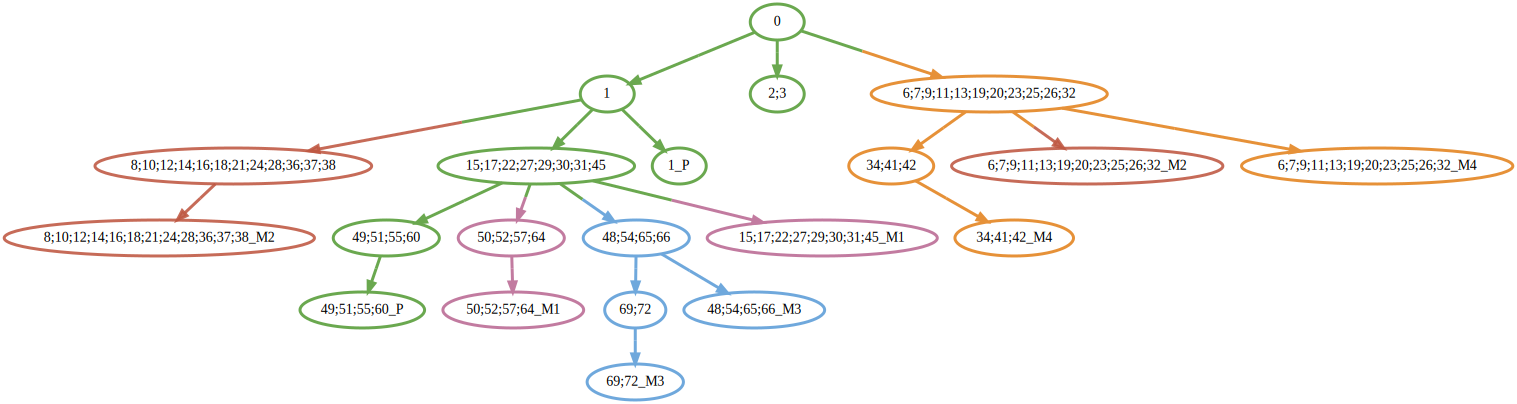

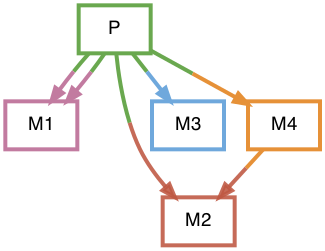

****************************** BEST TREE ******************************

Migration number: 6.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 1.368
Reg: 4.87777042388916
Loss: 93.246


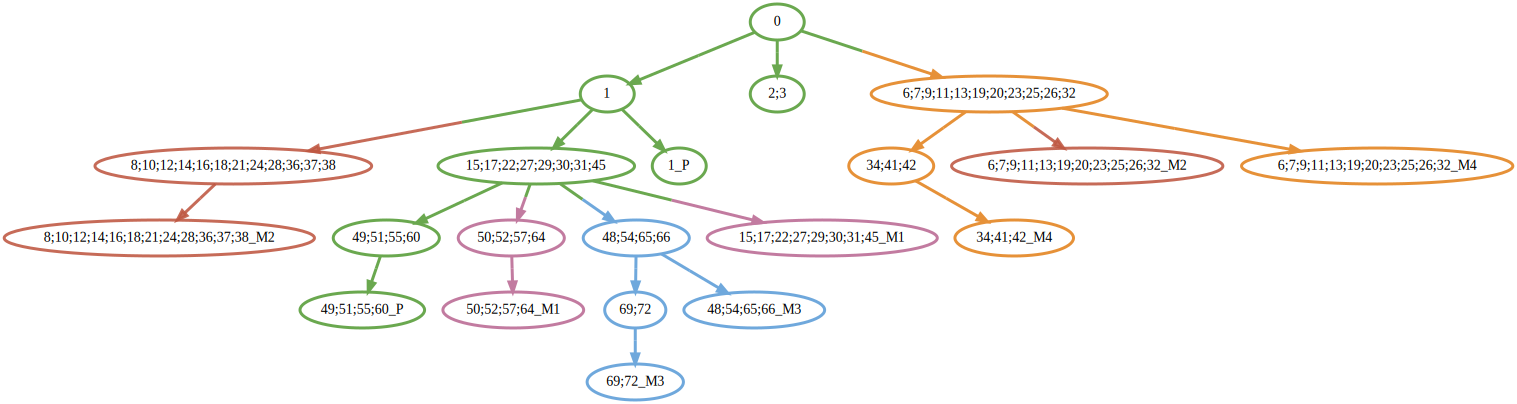

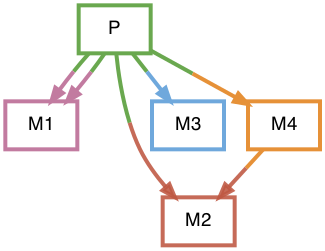

****************************************************************************************************
CPU times: user 17.2 s, sys: 21.9 s, total: 39 s
Wall time: 20.5 s


In [4]:
%%time

find_labelings_all_mutation_trees(os.path.join(MACHINA_DATA_DIR, f"{num_sites}_clustered_input", f"cluster_{mig_type}_seed{SEED}.txt"),
                                  os.path.join(MACHINA_DATA_DIR, f"{num_sites}_mut_trees", f"mut_trees_{mig_type}_seed{SEED}.txt"),
                                  os.path.join(MACHINA_DATA_DIR, f"{num_sites}_clustered_input", f"cluster_{mig_type}_seed{SEED}.tsv"),
                                  use_gen_dist=False)




num trees: 2
TREE 1
G
 tensor([[ 0.,  1.,  2., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  8.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 12.,  3.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  4.,  4.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])
{0: '0', 1: '1', 2: '2;3', 3: '6;7;9;11;13;19;20;23;25;26;32', 4: '8;10;12;14;16;18;21;24;28;36;37;38', 5: '34;41;42', 6: '15;17;22;27;29;30;31;45', 7: '49;51;55;60', 8: '50;52;57;64', 9: '48;54;65;66', 10: '69;72'}
['P', 'M1', 'M2', 'M3', 'M4']
epoch 0, lam1: 

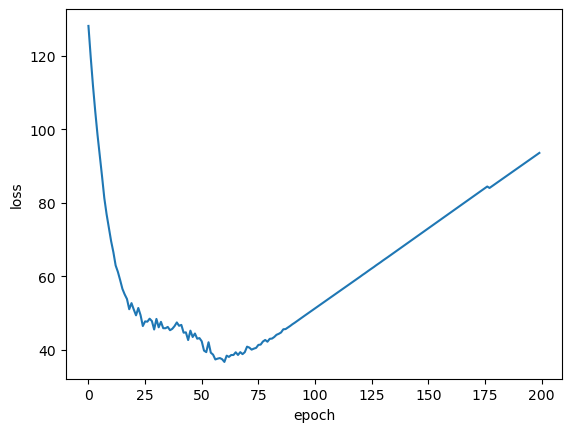

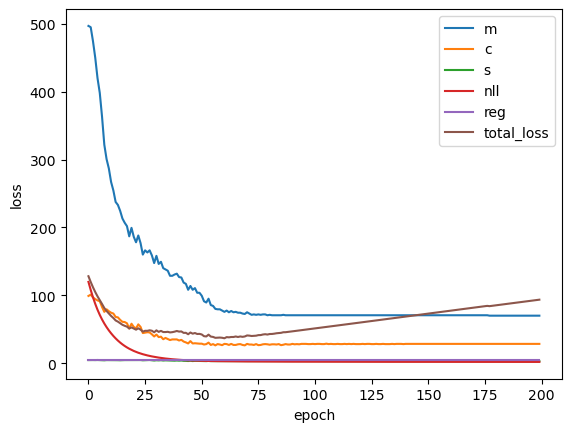

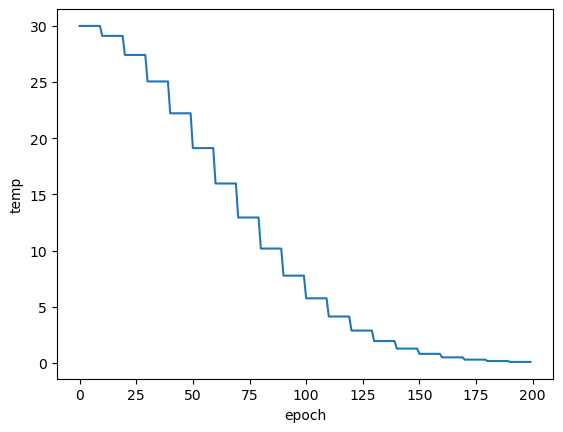

Time elapsed: 5.333913
============================== INTERMEDIATE TREE ==============================

Iteration: 0, Intermediate best tree idx 5
soft_X
                                        P    M1    M2    M3    M4
1                                  0.237 0.190 0.195 0.188 0.191
2;3                                0.224 0.199 0.192 0.187 0.198
6;7;9;11;13;19;20;23;25;26;32      0.203 0.197 0.196 0.208 0.196
8;10;12;14;16;18;21;24;28;36;37;38 0.196 0.195 0.211 0.207 0.190
34;41;42                           0.190 0.210 0.199 0.202 0.199
15;17;22;27;29;30;31;45            0.203 0.197 0.199 0.195 0.206
49;51;55;60                        0.200 0.196 0.197 0.202 0.205
50;52;57;64                        0.196 0.214 0.199 0.192 0.199
48;54;65;66                        0.197 0.196 0.196 0.205 0.207
69;72                              0.205 0.196 0.196 0.206 0.198
Migration number: 48.0
Comigration number: 19.0
Seeding site number: 5.0
Neg log likelihood: 124.868
Reg: 5.0
Genetic distance: 38

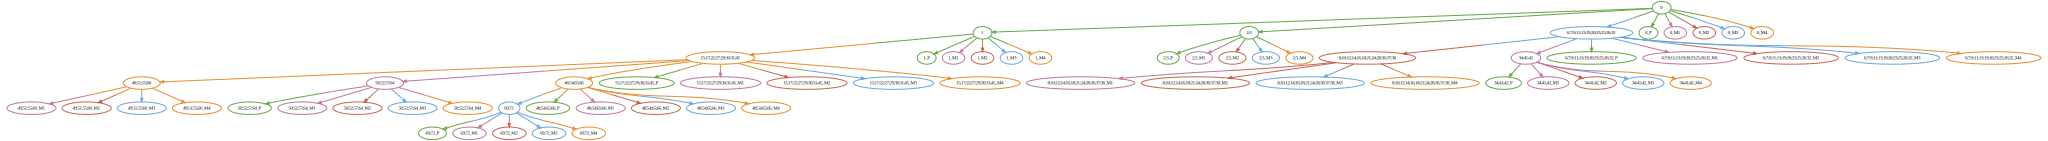

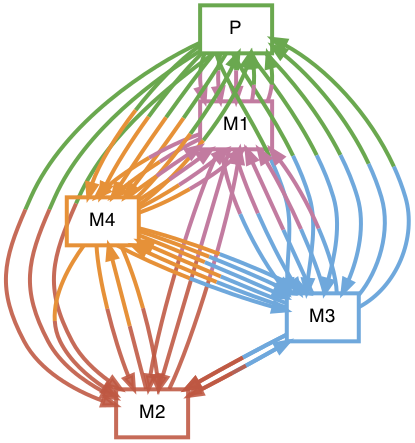

============================== INTERMEDIATE TREE ==============================

Iteration: 20, Intermediate best tree idx 5
soft_X
                                        P    M1    M2    M3    M4
1                                  0.223 0.199 0.202 0.191 0.186
2;3                                0.206 0.192 0.191 0.192 0.219
6;7;9;11;13;19;20;23;25;26;32      0.184 0.186 0.214 0.208 0.207
8;10;12;14;16;18;21;24;28;36;37;38 0.181 0.200 0.220 0.189 0.210
34;41;42                           0.197 0.198 0.208 0.179 0.217
15;17;22;27;29;30;31;45            0.190 0.205 0.185 0.193 0.227
49;51;55;60                        0.195 0.202 0.195 0.203 0.204
50;52;57;64                        0.190 0.191 0.194 0.224 0.199
48;54;65;66                        0.176 0.192 0.222 0.204 0.207
69;72                              0.188 0.212 0.196 0.222 0.182
Migration number: 21.0
Comigration number: 11.0
Seeding site number: 4.0
Neg log likelihood: 18.669
Reg: 5.000000476837158
Genetic distance: 106.0
Loss:

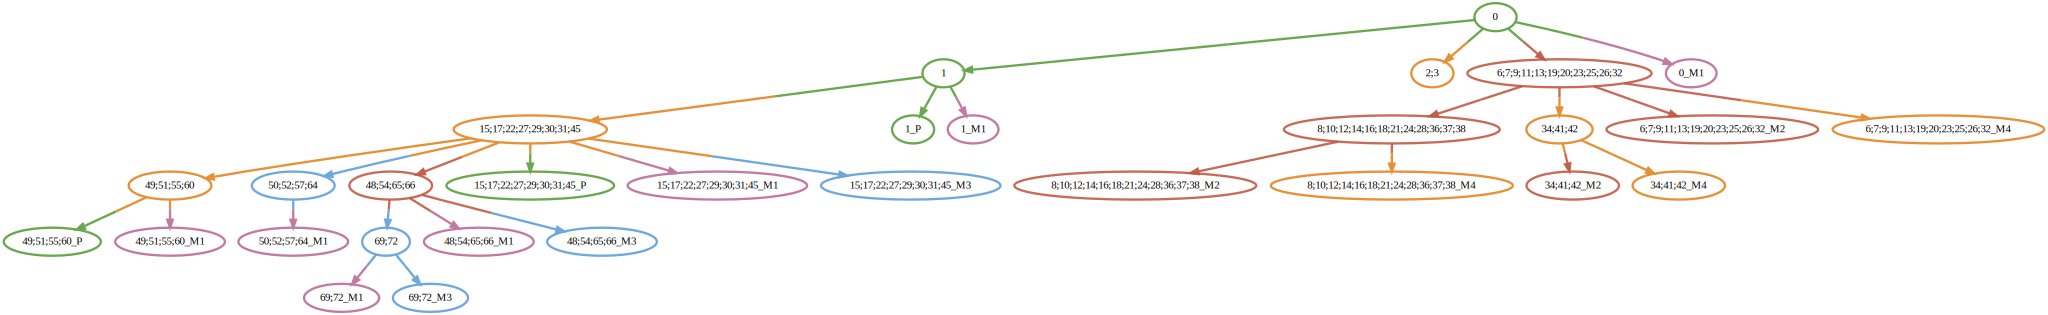

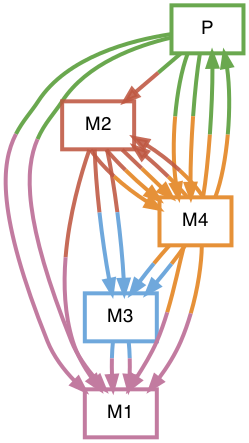

============================== INTERMEDIATE TREE ==============================

Iteration: 40, Intermediate best tree idx 5
soft_X
                                        P    M1    M2    M3    M4
1                                  0.236 0.213 0.203 0.174 0.173
2;3                                0.268 0.192 0.179 0.168 0.193
6;7;9;11;13;19;20;23;25;26;32      0.174 0.181 0.226 0.181 0.239
8;10;12;14;16;18;21;24;28;36;37;38 0.178 0.189 0.243 0.177 0.213
34;41;42                           0.169 0.204 0.224 0.163 0.240
15;17;22;27;29;30;31;45            0.180 0.210 0.169 0.251 0.189
49;51;55;60                        0.224 0.227 0.188 0.192 0.169
50;52;57;64                        0.173 0.230 0.197 0.201 0.199
48;54;65;66                        0.165 0.213 0.201 0.226 0.195
69;72                              0.176 0.233 0.198 0.222 0.171
Migration number: 14.0
Comigration number: 9.0
Seeding site number: 4.0
Neg log likelihood: 5.367
Reg: 5.0
Genetic distance: 39.0
Loss: 218.867


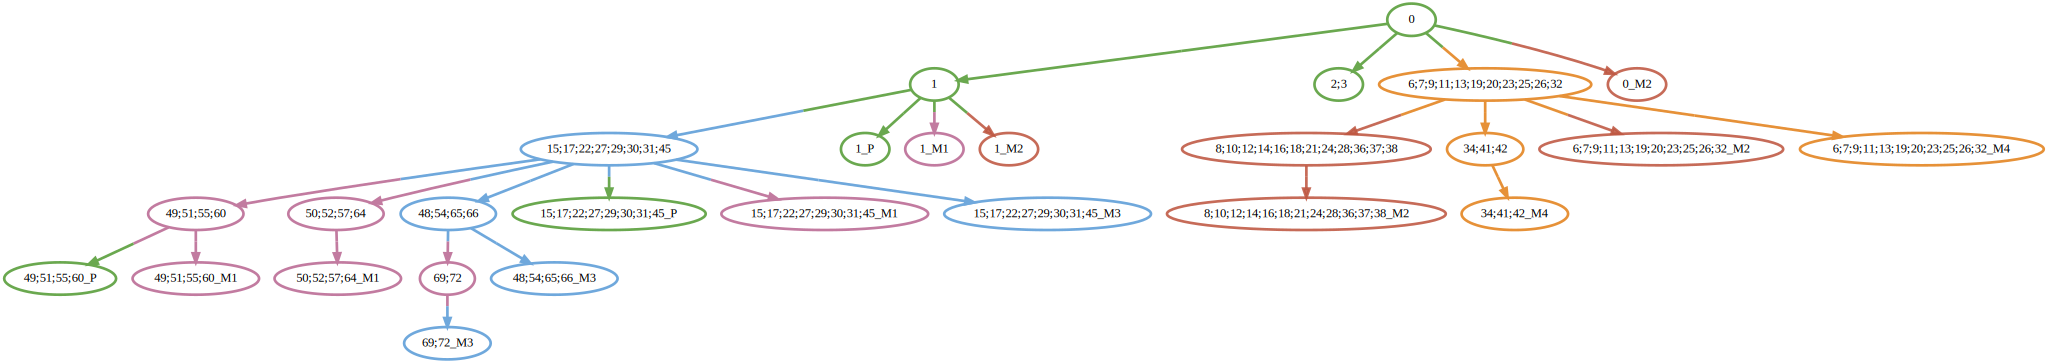

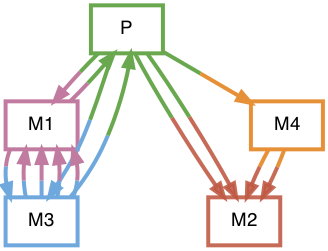

============================== INTERMEDIATE TREE ==============================

Iteration: 60, Intermediate best tree idx 5
soft_X
                                        P    M1    M2    M3    M4
1                                  0.306 0.198 0.215 0.139 0.141
2;3                                0.354 0.156 0.154 0.155 0.182
6;7;9;11;13;19;20;23;25;26;32      0.133 0.156 0.292 0.154 0.265
8;10;12;14;16;18;21;24;28;36;37;38 0.141 0.186 0.343 0.156 0.174
34;41;42                           0.144 0.149 0.253 0.157 0.297
15;17;22;27;29;30;31;45            0.173 0.280 0.153 0.215 0.180
49;51;55;60                        0.264 0.222 0.196 0.156 0.162
50;52;57;64                        0.154 0.310 0.156 0.188 0.191
48;54;65;66                        0.138 0.213 0.192 0.309 0.148
69;72                              0.150 0.202 0.187 0.314 0.147
Migration number: 7.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 2.955
Reg: 5.0
Genetic distance: -10.0
Loss: 100.955


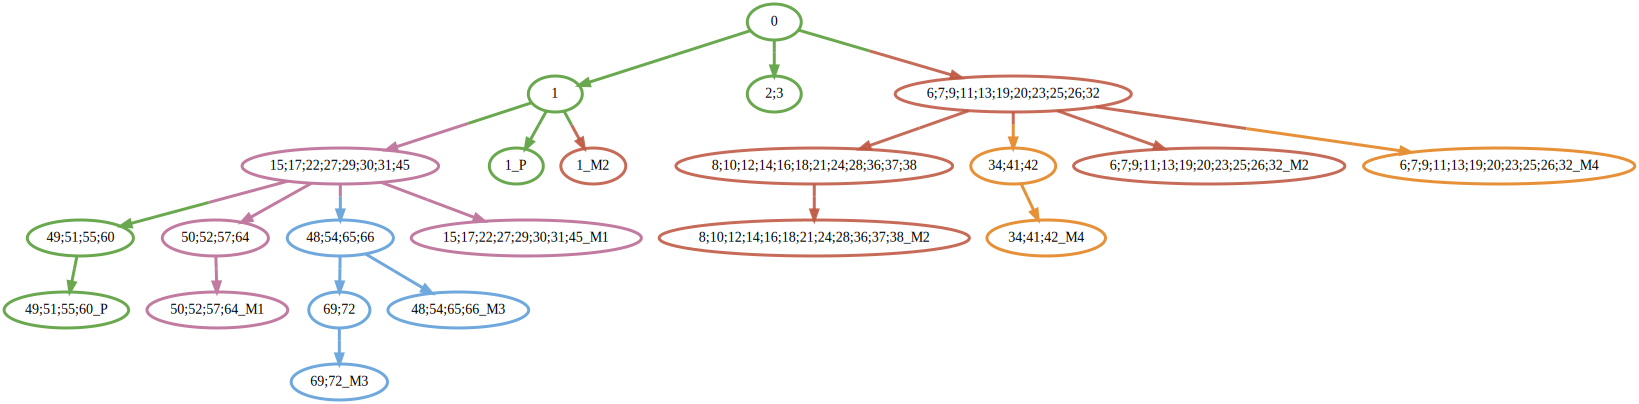

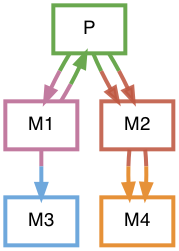

============================== INTERMEDIATE TREE ==============================

Iteration: 80, Intermediate best tree idx 5
soft_X
                                        P    M1    M2    M3    M4
1                                  0.440 0.128 0.252 0.087 0.093
2;3                                0.561 0.102 0.103 0.115 0.118
6;7;9;11;13;19;20;23;25;26;32      0.095 0.082 0.387 0.084 0.352
8;10;12;14;16;18;21;24;28;36;37;38 0.087 0.109 0.477 0.179 0.148
34;41;42                           0.101 0.106 0.210 0.098 0.485
15;17;22;27;29;30;31;45            0.159 0.347 0.115 0.241 0.139
49;51;55;60                        0.394 0.254 0.113 0.125 0.114
50;52;57;64                        0.127 0.482 0.103 0.149 0.140
48;54;65;66                        0.097 0.189 0.140 0.453 0.120
69;72                              0.096 0.187 0.127 0.479 0.112
Migration number: 7.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 2.427
Reg: 5.0
Genetic distance: -10.0
Loss: 100.427


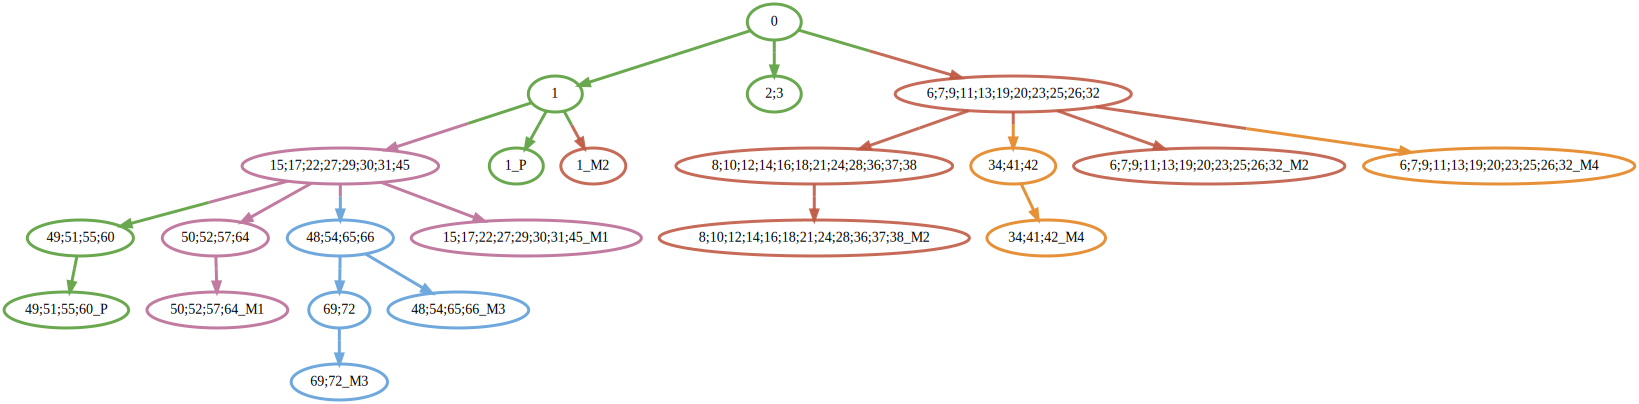

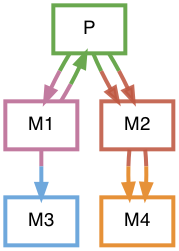

============================== INTERMEDIATE TREE ==============================

Iteration: 100, Intermediate best tree idx 5
soft_X
                                        P    M1    M2    M3    M4
1                                  0.744 0.058 0.138 0.026 0.035
2;3                                0.897 0.024 0.030 0.018 0.030
6;7;9;11;13;19;20;23;25;26;32      0.021 0.026 0.596 0.021 0.336
8;10;12;14;16;18;21;24;28;36;37;38 0.020 0.024 0.888 0.027 0.041
34;41;42                           0.033 0.033 0.112 0.029 0.793
15;17;22;27;29;30;31;45            0.047 0.819 0.026 0.073 0.035
49;51;55;60                        0.724 0.153 0.042 0.049 0.031
50;52;57;64                        0.019 0.889 0.026 0.039 0.027
48;54;65;66                        0.026 0.063 0.038 0.835 0.038
69;72                              0.017 0.033 0.030 0.897 0.022
Migration number: 7.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 2.209
Reg: 5.0
Genetic distance: -10.0
Loss: 100.209


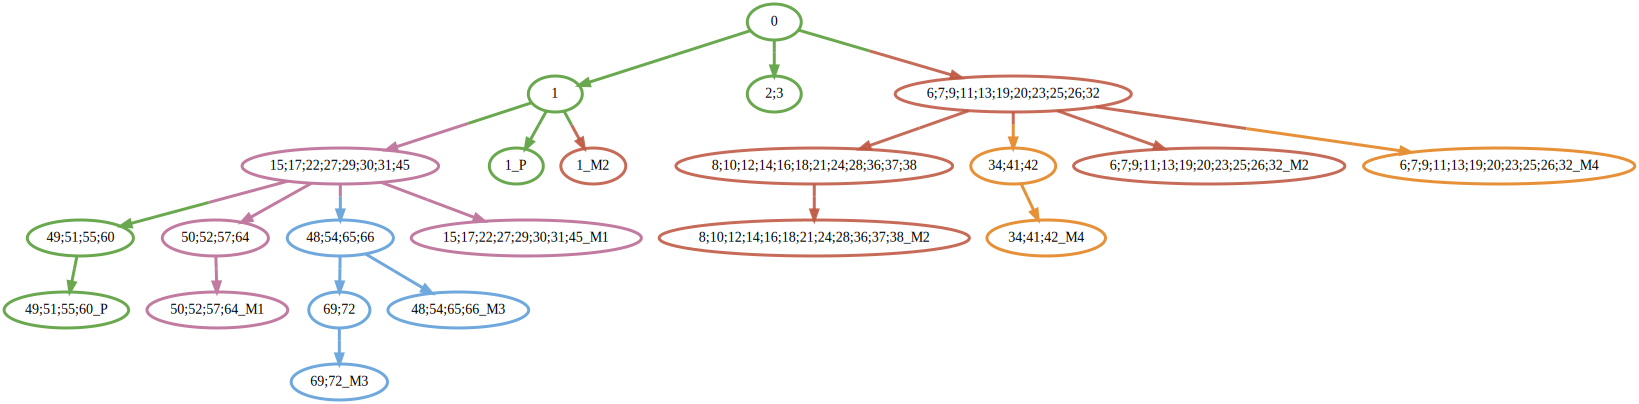

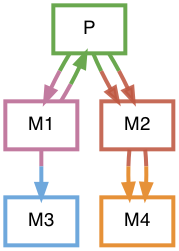

============================== INTERMEDIATE TREE ==============================

Iteration: 120, Intermediate best tree idx 5
soft_X
                                        P    M1    M2    M3    M4
1                                  0.989 0.001 0.008 0.000 0.001
2;3                                0.998 0.000 0.000 0.000 0.000
6;7;9;11;13;19;20;23;25;26;32      0.001 0.001 0.700 0.001 0.297
8;10;12;14;16;18;21;24;28;36;37;38 0.001 0.001 0.994 0.001 0.003
34;41;42                           0.001 0.001 0.020 0.000 0.978
15;17;22;27;29;30;31;45            0.001 0.992 0.001 0.005 0.001
49;51;55;60                        0.992 0.005 0.001 0.002 0.000
50;52;57;64                        0.001 0.995 0.001 0.003 0.001
48;54;65;66                        0.001 0.003 0.002 0.994 0.001
69;72                              0.001 0.002 0.001 0.996 0.001
Migration number: 7.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 2.078
Reg: 5.0
Genetic distance: -10.0
Loss: 100.078


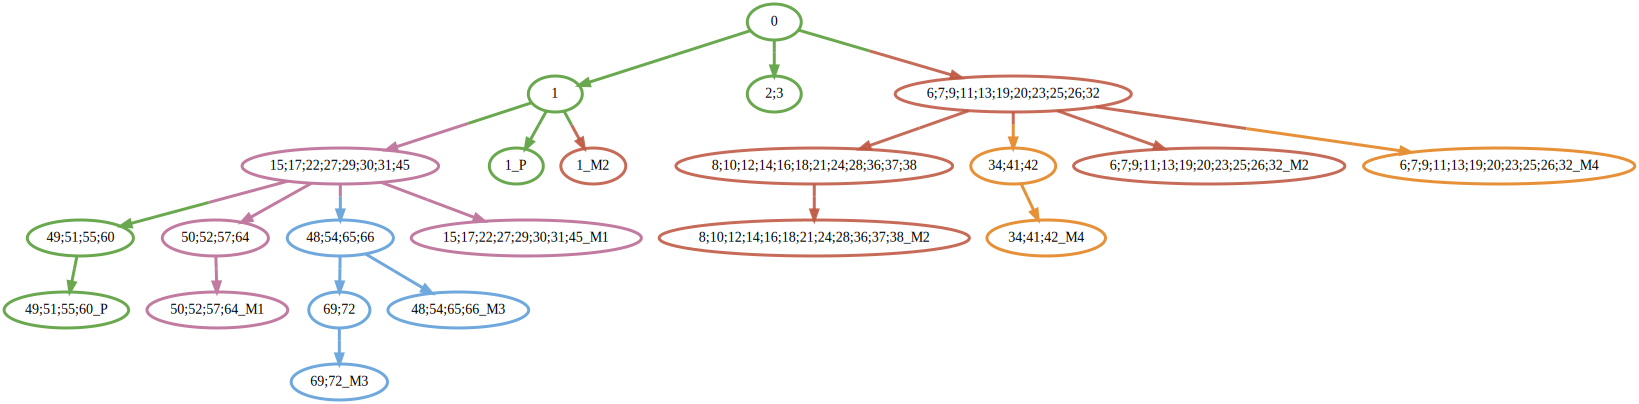

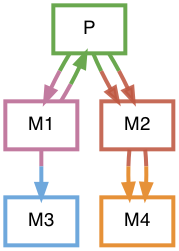

============================== INTERMEDIATE TREE ==============================

Iteration: 140, Intermediate best tree idx 5
soft_X
                                        P    M1    M2    M3    M4
1                                  1.000 0.000 0.000 0.000 0.000
2;3                                1.000 0.000 0.000 0.000 0.000
6;7;9;11;13;19;20;23;25;26;32      0.000 0.000 0.993 0.000 0.007
8;10;12;14;16;18;21;24;28;36;37;38 0.000 0.000 1.000 0.000 0.000
34;41;42                           0.000 0.000 0.000 0.000 1.000
15;17;22;27;29;30;31;45            0.000 1.000 0.000 0.000 0.000
49;51;55;60                        1.000 0.000 0.000 0.000 0.000
50;52;57;64                        0.000 1.000 0.000 0.000 0.000
48;54;65;66                        0.000 0.000 0.000 1.000 0.000
69;72                              0.000 0.000 0.000 1.000 0.000
Migration number: 7.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 1.995
Reg: 5.0
Genetic distance: -10.0
Loss: 99.995


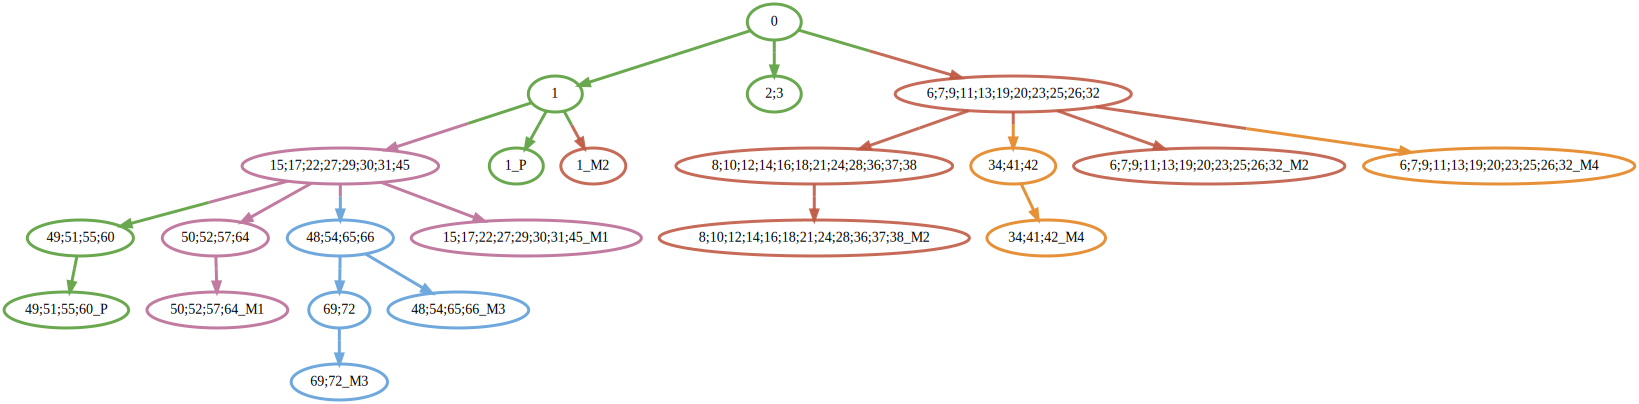

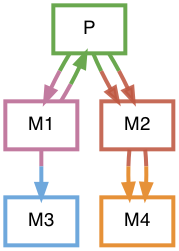

============================== INTERMEDIATE TREE ==============================

Iteration: 160, Intermediate best tree idx 5
soft_X
                                        P    M1    M2    M3    M4
1                                  1.000 0.000 0.000 0.000 0.000
2;3                                1.000 0.000 0.000 0.000 0.000
6;7;9;11;13;19;20;23;25;26;32      0.000 0.000 1.000 0.000 0.000
8;10;12;14;16;18;21;24;28;36;37;38 0.000 0.000 1.000 0.000 0.000
34;41;42                           0.000 0.000 0.000 0.000 1.000
15;17;22;27;29;30;31;45            0.000 1.000 0.000 0.000 0.000
49;51;55;60                        1.000 0.000 0.000 0.000 0.000
50;52;57;64                        0.000 1.000 0.000 0.000 0.000
48;54;65;66                        0.000 0.000 0.000 1.000 0.000
69;72                              0.000 0.000 0.000 1.000 0.000
Migration number: 7.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 1.941
Reg: 5.0
Genetic distance: -10.0
Loss: 99.941


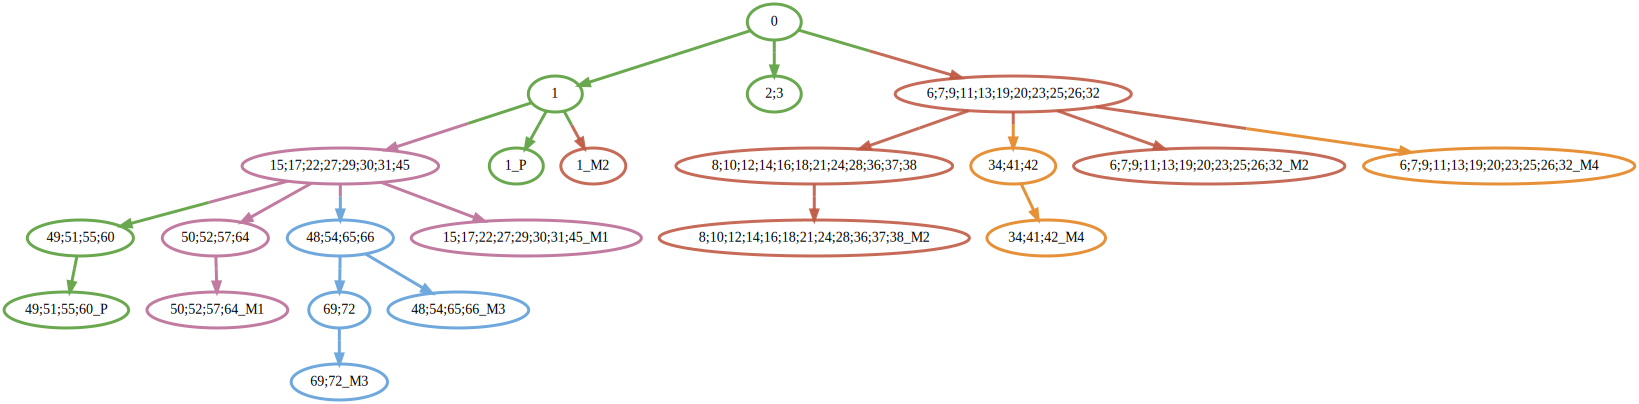

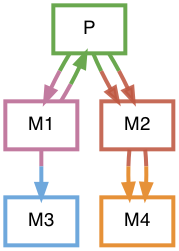

============================== INTERMEDIATE TREE ==============================

Iteration: 180, Intermediate best tree idx 5
soft_X
                                        P    M1    M2    M3    M4
1                                  1.000 0.000 0.000 0.000 0.000
2;3                                1.000 0.000 0.000 0.000 0.000
6;7;9;11;13;19;20;23;25;26;32      0.000 0.000 1.000 0.000 0.000
8;10;12;14;16;18;21;24;28;36;37;38 0.000 0.000 1.000 0.000 0.000
34;41;42                           0.000 0.000 0.000 0.000 1.000
15;17;22;27;29;30;31;45            0.000 1.000 0.000 0.000 0.000
49;51;55;60                        1.000 0.000 0.000 0.000 0.000
50;52;57;64                        0.000 1.000 0.000 0.000 0.000
48;54;65;66                        0.000 0.000 0.000 1.000 0.000
69;72                              0.000 0.000 0.000 1.000 0.000
Migration number: 6.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 1.908
Reg: 5.0
Genetic distance: -20.0
Loss: 84.908


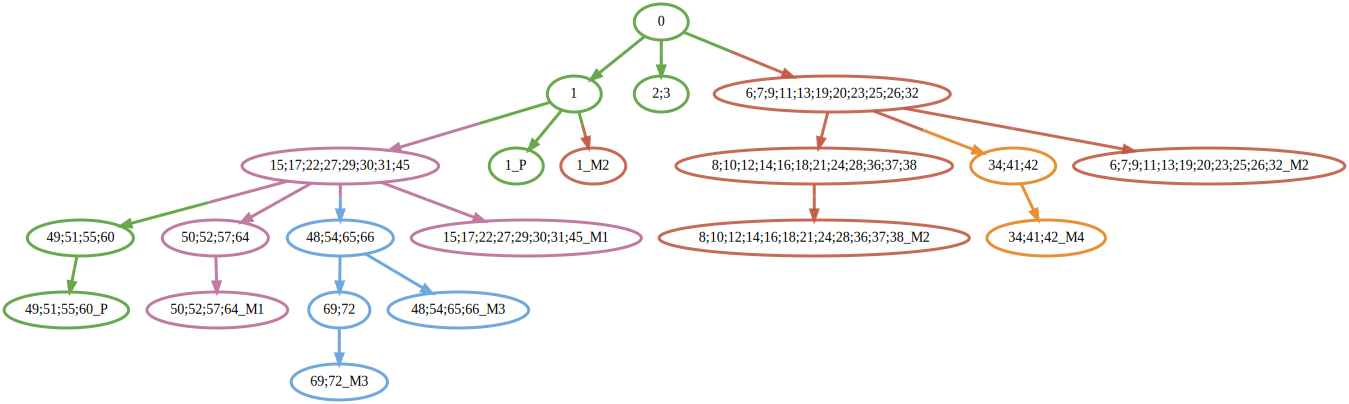

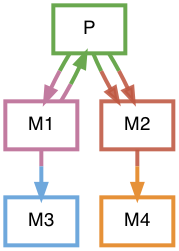

****************************** BEST TREE ******************************

Migration number: 6.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 1.38
Reg: 4.8206400871276855
Genetic distance: -20.0
Loss: 84.2


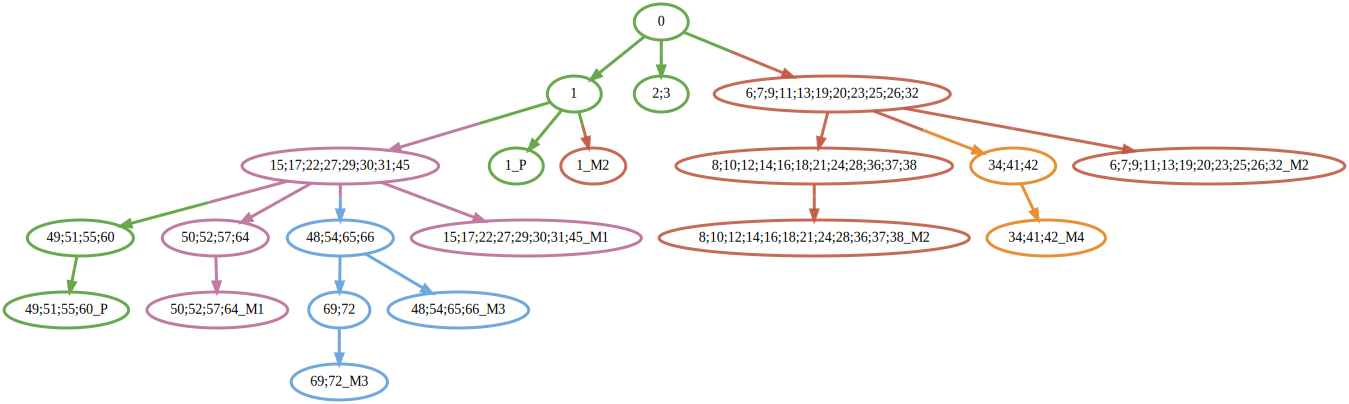

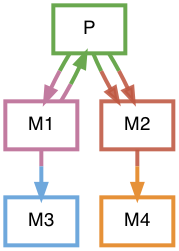

****************************************************************************************************
TREE 2
G
 tensor([[ 0.,  1.,  2., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 12.,  0.,  8.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  4.,  4.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])
{0: '0', 1: '1', 2: '2;3', 3: '6;7;9;11;13;19;20;23;25;26;32', 4: '8;10;12;14;16;18;21;24;28;36;37;38', 5: '34;41;42', 6: '15;17;22;27;29;30;31;45', 7: '49;51;55;60', 8: '50

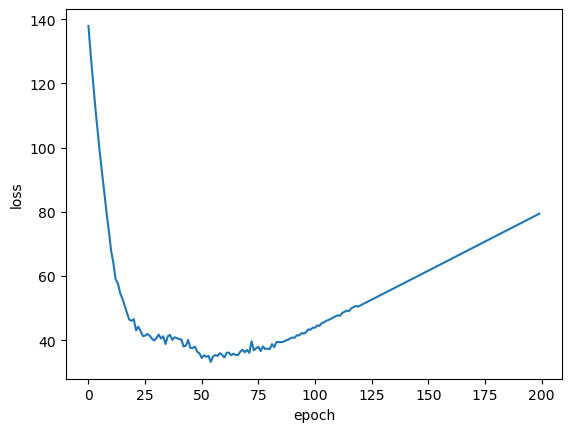

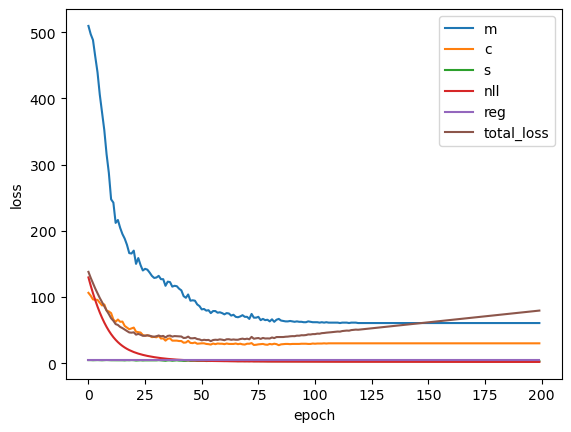

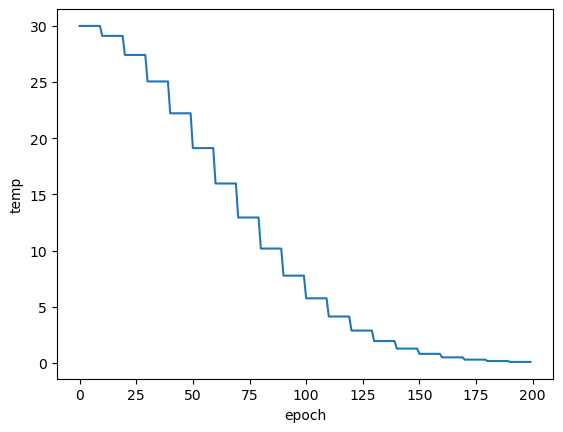

Time elapsed: 5.374405
============================== INTERMEDIATE TREE ==============================

Iteration: 0, Intermediate best tree idx 4
soft_X
                                        P    M1    M2    M3    M4
1                                  0.194 0.198 0.191 0.219 0.198
2;3                                0.202 0.201 0.206 0.191 0.200
6;7;9;11;13;19;20;23;25;26;32      0.196 0.199 0.191 0.207 0.207
8;10;12;14;16;18;21;24;28;36;37;38 0.198 0.196 0.199 0.195 0.211
34;41;42                           0.192 0.207 0.195 0.205 0.201
15;17;22;27;29;30;31;45            0.193 0.203 0.195 0.204 0.205
49;51;55;60                        0.197 0.212 0.200 0.185 0.205
50;52;57;64                        0.208 0.192 0.202 0.199 0.199
48;54;65;66                        0.218 0.190 0.198 0.198 0.196
69;72                              0.210 0.203 0.202 0.192 0.193
Migration number: 52.0
Comigration number: 23.0
Seeding site number: 5.0
Neg log likelihood: 119.238
Reg: 5.0
Genetic distance: 38

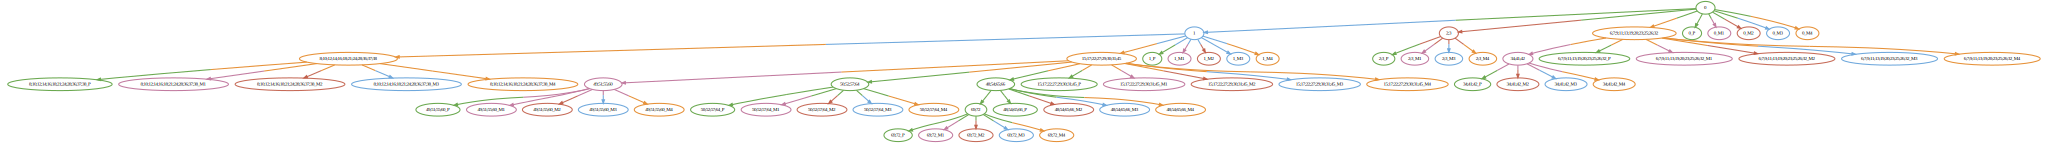

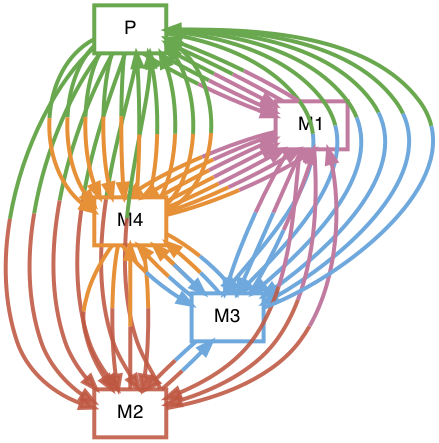

============================== INTERMEDIATE TREE ==============================

Iteration: 20, Intermediate best tree idx 4
soft_X
                                        P    M1    M2    M3    M4
1                                  0.209 0.207 0.196 0.197 0.190
2;3                                0.222 0.198 0.190 0.191 0.199
6;7;9;11;13;19;20;23;25;26;32      0.204 0.193 0.201 0.188 0.214
8;10;12;14;16;18;21;24;28;36;37;38 0.195 0.199 0.213 0.194 0.199
34;41;42                           0.183 0.185 0.211 0.202 0.218
15;17;22;27;29;30;31;45            0.210 0.211 0.203 0.195 0.181
49;51;55;60                        0.209 0.198 0.196 0.212 0.185
50;52;57;64                        0.196 0.217 0.189 0.210 0.189
48;54;65;66                        0.209 0.201 0.193 0.200 0.197
69;72                              0.208 0.221 0.185 0.205 0.181
Migration number: 15.0
Comigration number: 11.0
Seeding site number: 4.0
Neg log likelihood: 16.106
Reg: 5.0
Genetic distance: 49.0
Loss: 254.606


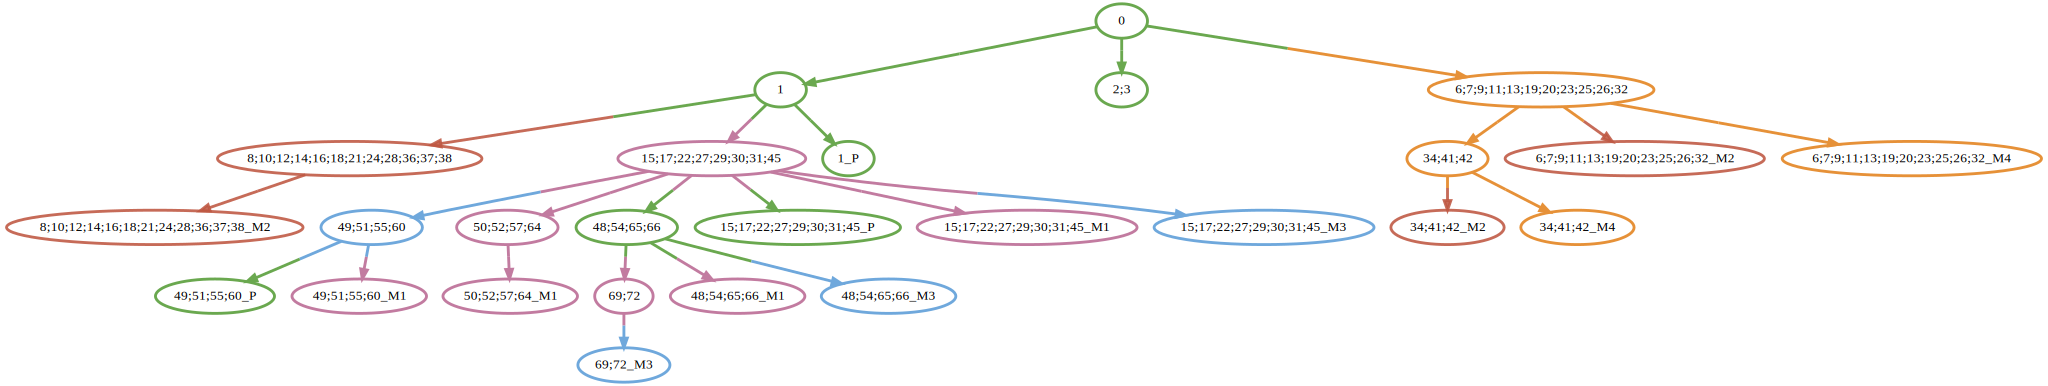

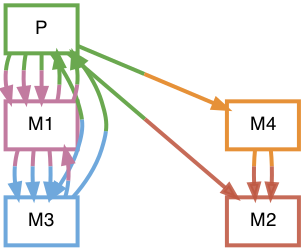

============================== INTERMEDIATE TREE ==============================

Iteration: 40, Intermediate best tree idx 4
soft_X
                                        P    M1    M2    M3    M4
1                                  0.271 0.198 0.176 0.174 0.181
2;3                                0.279 0.190 0.178 0.169 0.185
6;7;9;11;13;19;20;23;25;26;32      0.193 0.182 0.229 0.162 0.234
8;10;12;14;16;18;21;24;28;36;37;38 0.189 0.194 0.245 0.194 0.179
34;41;42                           0.167 0.166 0.230 0.198 0.239
15;17;22;27;29;30;31;45            0.221 0.228 0.180 0.202 0.169
49;51;55;60                        0.220 0.232 0.198 0.183 0.167
50;52;57;64                        0.190 0.248 0.178 0.208 0.177
48;54;65;66                        0.188 0.222 0.186 0.226 0.178
69;72                              0.185 0.198 0.193 0.235 0.190
Migration number: 9.0
Comigration number: 6.0
Seeding site number: 3.0
Neg log likelihood: 4.935
Reg: 5.0
Genetic distance: 15.0
Loss: 140.435


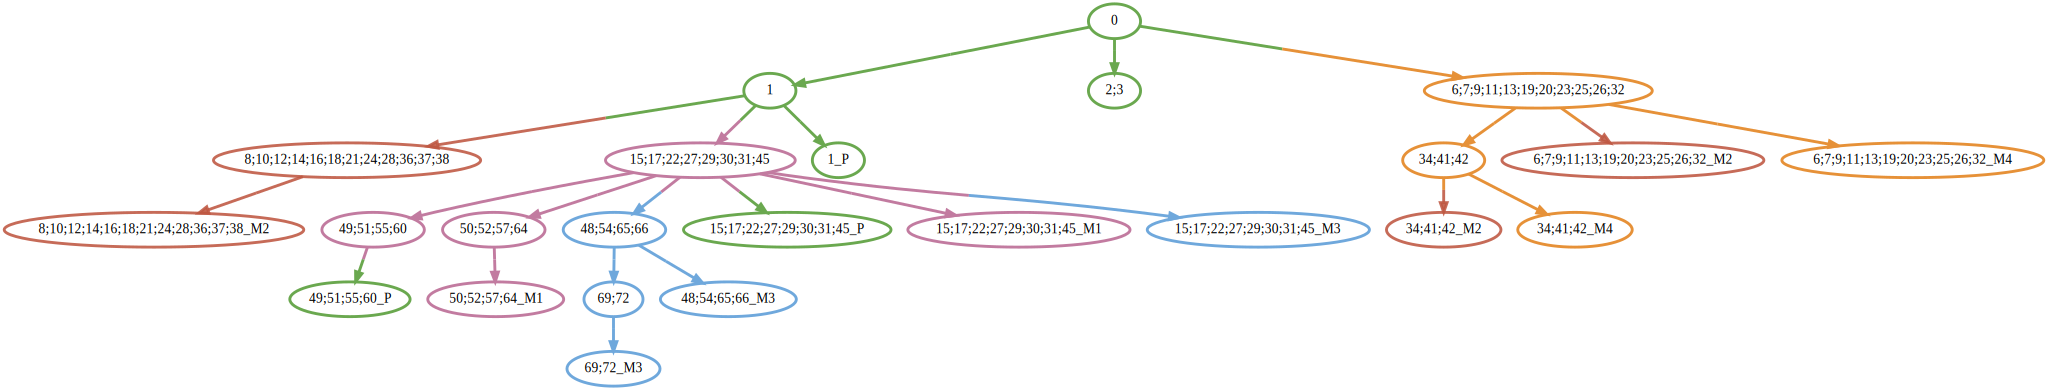

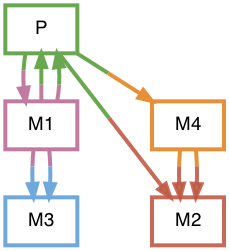

============================== INTERMEDIATE TREE ==============================

Iteration: 60, Intermediate best tree idx 4
soft_X
                                        P    M1    M2    M3    M4
1                                  0.322 0.189 0.175 0.159 0.155
2;3                                0.344 0.156 0.152 0.181 0.167
6;7;9;11;13;19;20;23;25;26;32      0.143 0.137 0.261 0.154 0.305
8;10;12;14;16;18;21;24;28;36;37;38 0.163 0.150 0.368 0.153 0.166
34;41;42                           0.132 0.165 0.289 0.136 0.276
15;17;22;27;29;30;31;45            0.195 0.286 0.164 0.206 0.150
49;51;55;60                        0.268 0.266 0.165 0.158 0.143
50;52;57;64                        0.178 0.310 0.171 0.178 0.162
48;54;65;66                        0.160 0.208 0.159 0.320 0.152
69;72                              0.162 0.181 0.175 0.314 0.168
Migration number: 8.0
Comigration number: 7.0
Seeding site number: 4.0
Neg log likelihood: 2.915
Reg: 4.999999523162842
Genetic distance: -22.0
Loss: 11

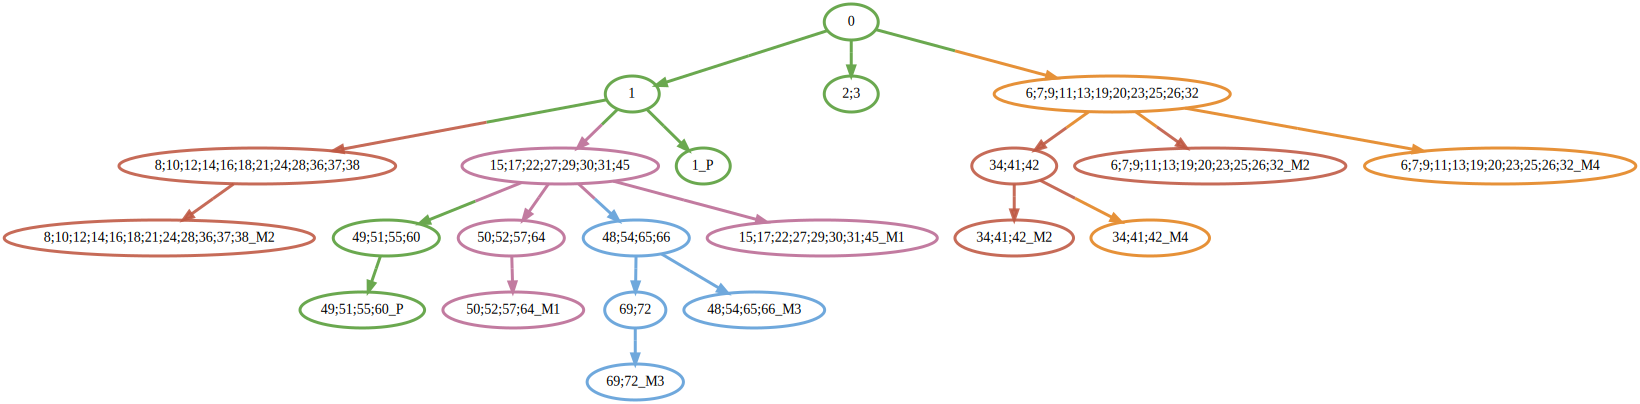

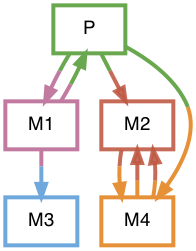

============================== INTERMEDIATE TREE ==============================

Iteration: 80, Intermediate best tree idx 4
soft_X
                                        P    M1    M2    M3    M4
1                                  0.585 0.093 0.117 0.105 0.100
2;3                                0.502 0.142 0.114 0.107 0.135
6;7;9;11;13;19;20;23;25;26;32      0.086 0.077 0.360 0.079 0.398
8;10;12;14;16;18;21;24;28;36;37;38 0.107 0.103 0.571 0.119 0.100
34;41;42                           0.098 0.076 0.353 0.091 0.382
15;17;22;27;29;30;31;45            0.199 0.411 0.122 0.164 0.104
49;51;55;60                        0.438 0.231 0.116 0.126 0.088
50;52;57;64                        0.137 0.499 0.100 0.134 0.130
48;54;65;66                        0.130 0.175 0.111 0.452 0.133
69;72                              0.108 0.150 0.130 0.493 0.120
Migration number: 6.0
Comigration number: 6.0
Seeding site number: 3.0
Neg log likelihood: 2.367
Reg: 5.0
Genetic distance: -29.0
Loss: 85.867


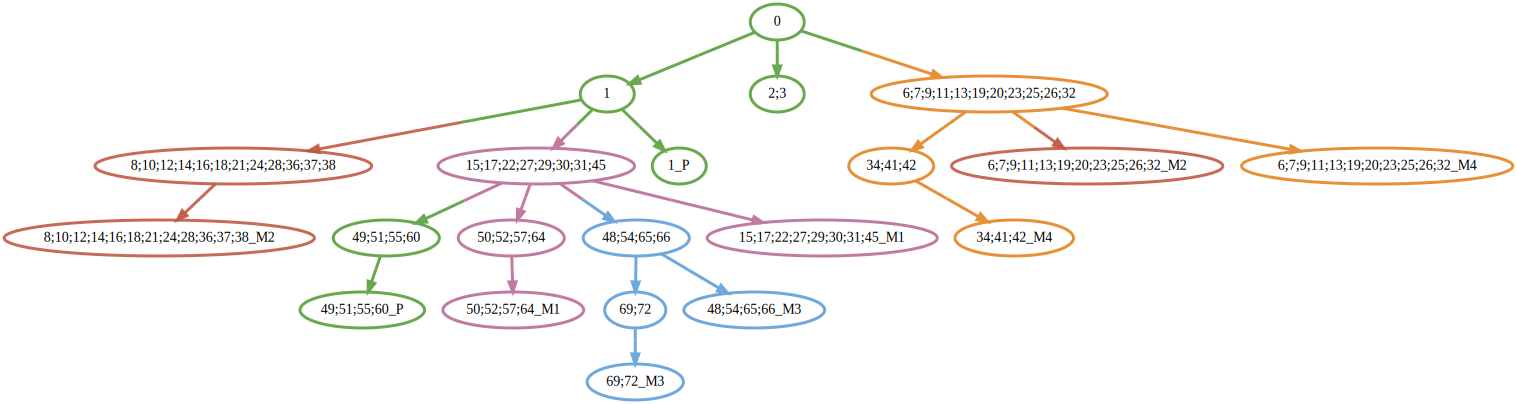

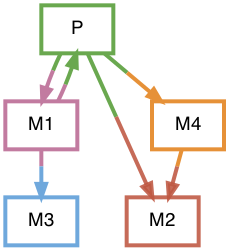

============================== INTERMEDIATE TREE ==============================

Iteration: 100, Intermediate best tree idx 4
soft_X
                                        P    M1    M2    M3    M4
1                                  0.859 0.046 0.032 0.027 0.036
2;3                                0.867 0.032 0.032 0.032 0.037
6;7;9;11;13;19;20;23;25;26;32      0.022 0.028 0.334 0.027 0.588
8;10;12;14;16;18;21;24;28;36;37;38 0.028 0.025 0.894 0.026 0.027
34;41;42                           0.026 0.026 0.194 0.040 0.713
15;17;22;27;29;30;31;45            0.054 0.815 0.044 0.052 0.035
49;51;55;60                        0.836 0.082 0.032 0.027 0.022
50;52;57;64                        0.029 0.881 0.025 0.039 0.026
48;54;65;66                        0.041 0.059 0.028 0.839 0.032
69;72                              0.031 0.038 0.038 0.867 0.026
Migration number: 6.0
Comigration number: 6.0
Seeding site number: 3.0
Neg log likelihood: 2.149
Reg: 5.0
Genetic distance: -29.0
Loss: 85.649


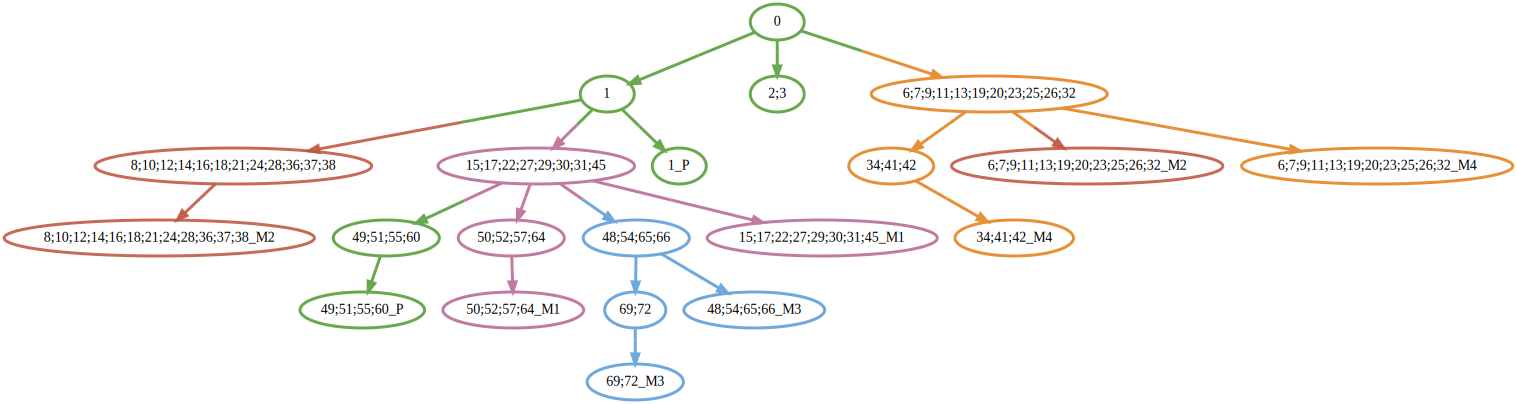

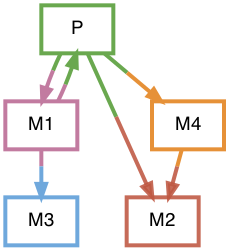

============================== INTERMEDIATE TREE ==============================

Iteration: 120, Intermediate best tree idx 4
soft_X
                                        P    M1    M2    M3    M4
1                                  0.998 0.001 0.001 0.001 0.000
2;3                                0.996 0.001 0.002 0.002 0.001
6;7;9;11;13;19;20;23;25;26;32      0.000 0.001 0.042 0.000 0.956
8;10;12;14;16;18;21;24;28;36;37;38 0.001 0.001 0.997 0.001 0.000
34;41;42                           0.001 0.001 0.023 0.001 0.975
15;17;22;27;29;30;31;45            0.002 0.992 0.001 0.004 0.001
49;51;55;60                        0.992 0.006 0.001 0.001 0.001
50;52;57;64                        0.001 0.997 0.001 0.001 0.000
48;54;65;66                        0.001 0.003 0.001 0.995 0.001
69;72                              0.000 0.001 0.000 0.998 0.000
Migration number: 6.0
Comigration number: 6.0
Seeding site number: 3.0
Neg log likelihood: 2.025
Reg: 5.0
Genetic distance: -29.0
Loss: 85.525


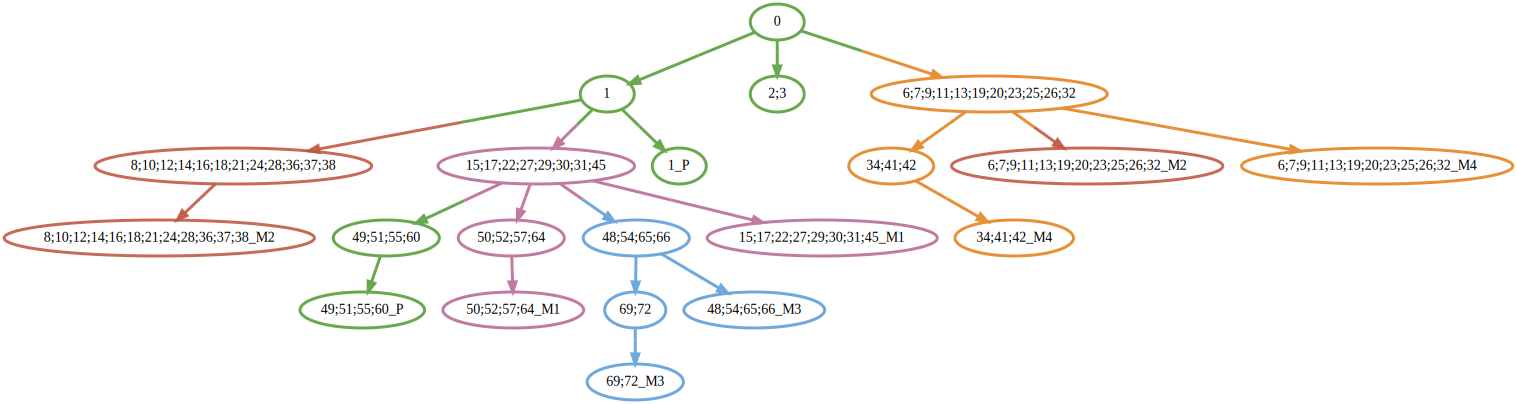

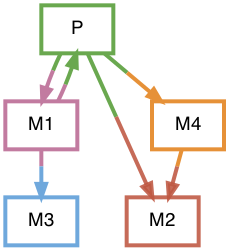

============================== INTERMEDIATE TREE ==============================

Iteration: 140, Intermediate best tree idx 4
soft_X
                                        P    M1    M2    M3    M4
1                                  1.000 0.000 0.000 0.000 0.000
2;3                                1.000 0.000 0.000 0.000 0.000
6;7;9;11;13;19;20;23;25;26;32      0.000 0.000 0.001 0.000 0.999
8;10;12;14;16;18;21;24;28;36;37;38 0.000 0.000 1.000 0.000 0.000
34;41;42                           0.000 0.000 0.000 0.000 1.000
15;17;22;27;29;30;31;45            0.000 1.000 0.000 0.000 0.000
49;51;55;60                        1.000 0.000 0.000 0.000 0.000
50;52;57;64                        0.000 1.000 0.000 0.000 0.000
48;54;65;66                        0.000 0.000 0.000 1.000 0.000
69;72                              0.000 0.000 0.000 1.000 0.000
Migration number: 6.0
Comigration number: 6.0
Seeding site number: 3.0
Neg log likelihood: 1.946
Reg: 5.0
Genetic distance: -29.0
Loss: 85.446


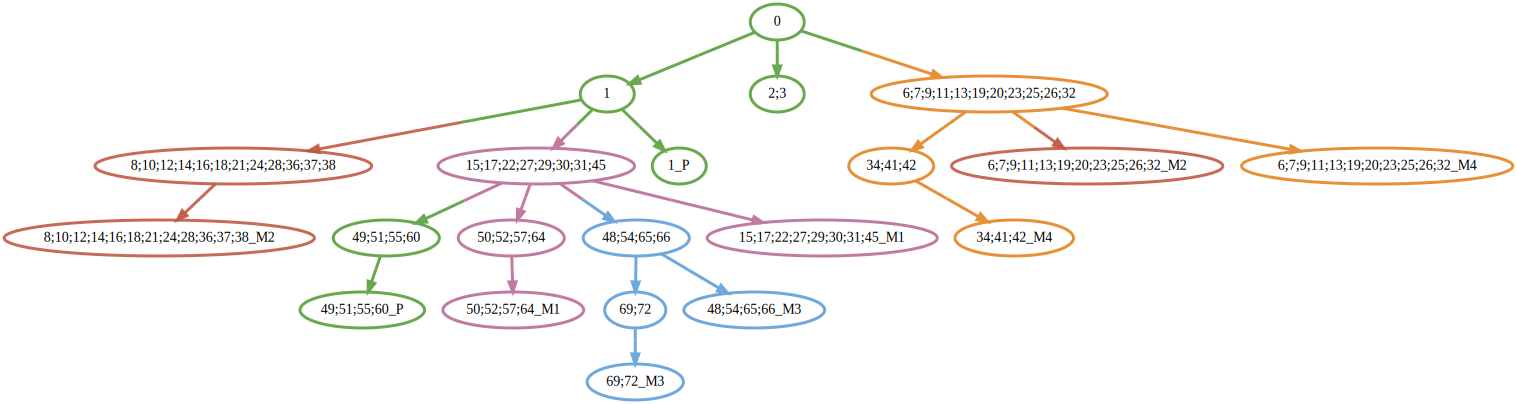

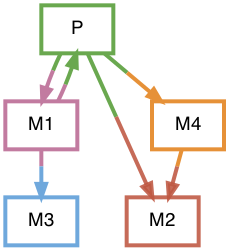

============================== INTERMEDIATE TREE ==============================

Iteration: 160, Intermediate best tree idx 4
soft_X
                                        P    M1    M2    M3    M4
1                                  1.000 0.000 0.000 0.000 0.000
2;3                                1.000 0.000 0.000 0.000 0.000
6;7;9;11;13;19;20;23;25;26;32      0.000 0.000 0.000 0.000 1.000
8;10;12;14;16;18;21;24;28;36;37;38 0.000 0.000 1.000 0.000 0.000
34;41;42                           0.000 0.000 0.000 0.000 1.000
15;17;22;27;29;30;31;45            0.000 1.000 0.000 0.000 0.000
49;51;55;60                        1.000 0.000 0.000 0.000 0.000
50;52;57;64                        0.000 1.000 0.000 0.000 0.000
48;54;65;66                        0.000 0.000 0.000 1.000 0.000
69;72                              0.000 0.000 0.000 1.000 0.000
Migration number: 6.0
Comigration number: 6.0
Seeding site number: 3.0
Neg log likelihood: 1.897
Reg: 5.0
Genetic distance: -29.0
Loss: 85.397


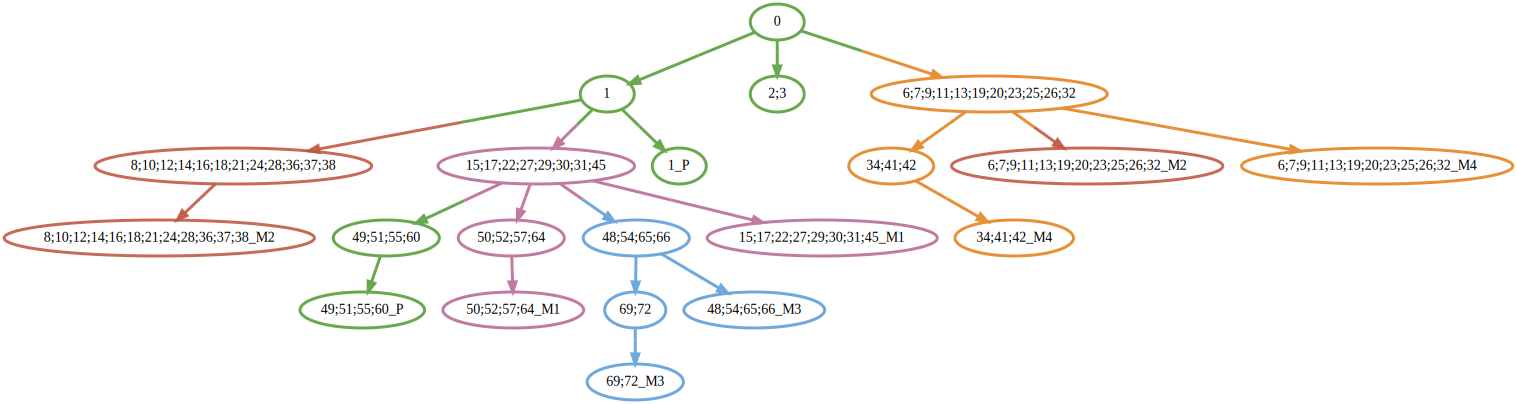

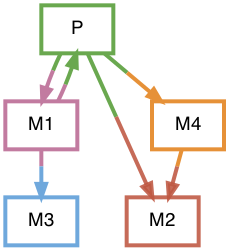

============================== INTERMEDIATE TREE ==============================

Iteration: 180, Intermediate best tree idx 4
soft_X
                                        P    M1    M2    M3    M4
1                                  1.000 0.000 0.000 0.000 0.000
2;3                                1.000 0.000 0.000 0.000 0.000
6;7;9;11;13;19;20;23;25;26;32      0.000 0.000 0.000 0.000 1.000
8;10;12;14;16;18;21;24;28;36;37;38 0.000 0.000 1.000 0.000 0.000
34;41;42                           0.000 0.000 0.000 0.000 1.000
15;17;22;27;29;30;31;45            0.000 1.000 0.000 0.000 0.000
49;51;55;60                        1.000 0.000 0.000 0.000 0.000
50;52;57;64                        0.000 1.000 0.000 0.000 0.000
48;54;65;66                        0.000 0.000 0.000 1.000 0.000
69;72                              0.000 0.000 0.000 1.000 0.000
Migration number: 6.0
Comigration number: 6.0
Seeding site number: 3.0
Neg log likelihood: 1.867
Reg: 4.999999523162842
Genetic distance: -29.0
Loss: 8

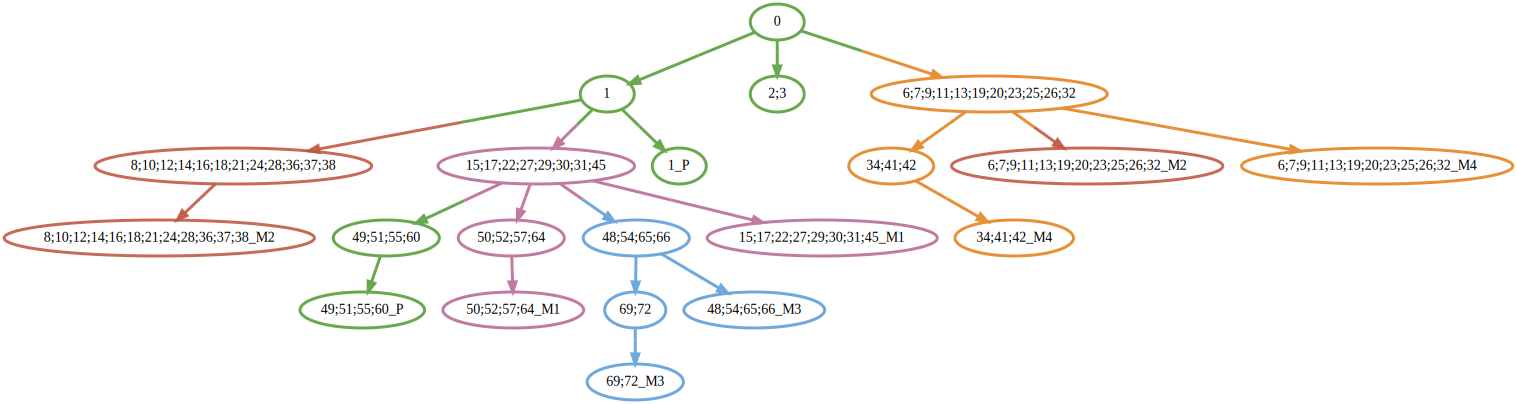

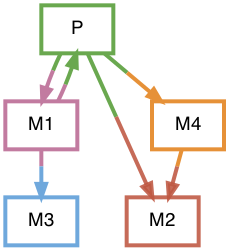

****************************** BEST TREE ******************************

Migration number: 6.0
Comigration number: 6.0
Seeding site number: 3.0
Neg log likelihood: 1.382
Reg: 4.8788676261901855
Genetic distance: -29.0
Loss: 84.761


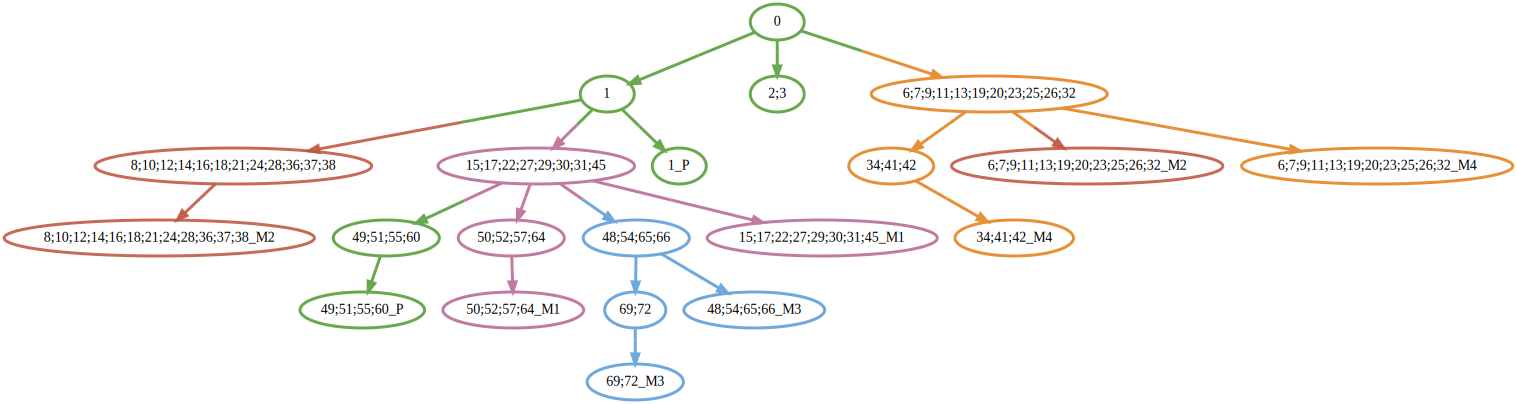

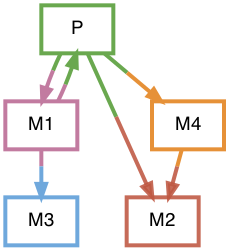

****************************************************************************************************
CPU times: user 19.5 s, sys: 20.7 s, total: 40.3 s
Wall time: 21.6 s


In [5]:
%%time

find_labelings_all_mutation_trees(os.path.join(MACHINA_DATA_DIR, f"{num_sites}_clustered_input", f"cluster_{mig_type}_seed{SEED}.txt"),
                                  os.path.join(MACHINA_DATA_DIR, f"{num_sites}_mut_trees", f"mut_trees_{mig_type}_seed{SEED}.txt"),
                                  os.path.join(MACHINA_DATA_DIR, f"{num_sites}_clustered_input", f"cluster_{mig_type}_seed{SEED}.tsv"),
                                  use_gen_dist=True)




In [7]:
!which python


/Users/divyakoyyalagunta/mambaforge/envs/metf/bin/python


In [6]:
p = "/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/test/machina_simulated_data/predictions_wm3_wc2_wg0.5_bs32_11032022"
p = os.path.join(p, num_sites, mig_type)
visualize_ground_truth(os.path.join(p, f"T_tree0_seed{SEED}.predicted.tree"), os.path.join(p, f"G_tree0_seed{SEED}.predicted.tree"))


TypeError: can only concatenate str (not "ParseException") to str

In [ ]:
import fnmatch
import matplotlib.pyplot as plt
def count_trees(sims_data_dir):
    sites = ["m8", "m5"]
    mig_types = ["M", "mS", "R", "S"]
    tree_cts = []
    ct = 0
    seed_ct = 0
    for site in sites:
        for mig_type in mig_types:
            local_ct = 0
            site_mig_data_dir = os.path.join(sims_data_dir, site, mig_type)
            seeds = fnmatch.filter(os.listdir(site_mig_data_dir), 'reads_seed*.tsv')
            seeds = [s.replace(".tsv", "").replace("reads_seed", "") for s in seeds]
            for seed in seeds:
                all_mut_trees_fn = os.path.join(sims_data_dir, f"{site}_mut_trees", f"mut_trees_{mig_type}_seed{seed}.txt")
                with open(all_mut_trees_fn, 'r') as f:
                    for line in f:
                        if "#trees" in line:
                            tree_ct = int(line.split()[0])
                            tree_cts.append(tree_ct)
                            if tree_ct > 50:
                                print("tree > 50 trees", site, mig_type, seed, tree_ct)
                            ct += tree_ct
                            local_ct += tree_ct
                            break
                seed_ct += 1
            print(site, mig_type, local_ct)
    print(tree_cts)
    plt.hist(tree_cts)
    plt.show()
    plt.close()
    print("Number of total trees:", ct)

count_trees(MACHINA_DATA_DIR)
count_trees(RERUN_SIM_DIR)

In [ ]:
fn = "/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/results_8cores_time_test.txt"
fn2 = "/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/results_8cores_time_test2.txt"
from datetime import datetime

output = []
with open(fn) as f:
    for i,line in enumerate(f):
        items = line.strip().split(',')
        if i != 0:
            epoch_time = datetime(1900, 1, 1)
            
            secs = (datetime.strptime(items[4][items[4].find('days')+5:], "%H:%M:%S.%f") - epoch_time).total_seconds()
            #print(secs)
            items[4] = secs
            #print(items)
            output.append(items)
        else:
            output.append(items)

print(output)
import csv
with open(fn2, 'w', newline='') as tsvfile:
    writer = csv.writer(tsvfile, delimiter=',', lineterminator='\n')
    for line in output:
        writer.writerow(line)

In [ ]:
mig_type = "S"
SEED = 23

RERUN_SIM_DIR = os.path.join(repo_dir, 'src/data/rerun_machina_sims')
RERUN_SIM_DATA_DIR = os.path.join(RERUN_SIM_DIR, num_sites, mig_type)

print("Manually generated sims")
visualize_ground_truth(os.path.join(RERUN_SIM_DATA_DIR, f"T_seed{SEED}.dot"), os.path.join(RERUN_SIM_DATA_DIR, f"G_seed{SEED}.dot"))


In [ ]:
import numpy as np
epoch = 10
x = max(0.01, 1.0/(1.0+np.exp(-1.0*(epoch-10))))
x
#np.max(0.01, 1.0/(1.0+np.exp(-1.0*(epoch-10))))